# **KMeans**

In [1]:
import pandas as pd

df = pd.read_csv("uniprot.csv")
df.head()

Unnamed: 0      ID         Name               Species  \
0           1  Q8IV20  LACC1_HUMAN  Homo sapiens (Human)   
1           2  Q9H257  CARD9_HUMAN  Homo sapiens (Human)   
2           3  Q8BZT5  LRC19_MOUSE  Mus musculus (Mouse)   
3           4  P10145    IL8_HUMAN  Homo sapiens (Human)   
4           5  P09429  HMGB1_HUMAN  Homo sapiens (Human)   

                                            Sequence  
0  MAEAVLIDLFGLKLNSQKNCHQTLLKTLNAVQYHHAAKAKFLCIMC...  
1  MSDYENDDECWSVLEGFRVTLTSVIDPSRITPYLRQCKVLNPDDEE...  
2  MKVTRFMFWLFSMLLPSVKSQASETEVPCNFSRRNYTLIPEGISTN...  
3  MTSKLAVALLAAFLISAALCEGAVLPRSAKELRCQCIKTYSKPFHP...  
4  MGKGDPKKPRGKMSSYAFFVQTCREEHKKKHPDASVNFSEFSKKCS...

In [2]:
k = len(df['Species'].unique())
df = df[['ID', 'Sequence']]
df.head()

ID                                           Sequence
0  Q8IV20  MAEAVLIDLFGLKLNSQKNCHQTLLKTLNAVQYHHAAKAKFLCIMC...
1  Q9H257  MSDYENDDECWSVLEGFRVTLTSVIDPSRITPYLRQCKVLNPDDEE...
2  Q8BZT5  MKVTRFMFWLFSMLLPSVKSQASETEVPCNFSRRNYTLIPEGISTN...
3  P10145  MTSKLAVALLAAFLISAALCEGAVLPRSAKELRCQCIKTYSKPFHP...
4  P09429  MGKGDPKKPRGKMSSYAFFVQTCREEHKKKHPDASVNFSEFSKKCS...

In [3]:
print(k)

770


In [4]:
df.shape

(17166, 2)

In [5]:
def ngrams(seq, n=3):
    return([seq[i:i+n] for i in range(len(seq)-n+1)])

df['features'] = df['Sequence'].apply(ngrams)
df.head()

ID                                           Sequence  \
0  Q8IV20  MAEAVLIDLFGLKLNSQKNCHQTLLKTLNAVQYHHAAKAKFLCIMC...   
1  Q9H257  MSDYENDDECWSVLEGFRVTLTSVIDPSRITPYLRQCKVLNPDDEE...   
2  Q8BZT5  MKVTRFMFWLFSMLLPSVKSQASETEVPCNFSRRNYTLIPEGISTN...   
3  P10145  MTSKLAVALLAAFLISAALCEGAVLPRSAKELRCQCIKTYSKPFHP...   
4  P09429  MGKGDPKKPRGKMSSYAFFVQTCREEHKKKHPDASVNFSEFSKKCS...   

                                            features  
0  [MAE, AEA, EAV, AVL, VLI, LID, IDL, DLF, LFG, ...  
1  [MSD, SDY, DYE, YEN, END, NDD, DDE, DEC, ECW, ...  
2  [MKV, KVT, VTR, TRF, RFM, FMF, MFW, FWL, WLF, ...  
3  [MTS, TSK, SKL, KLA, LAV, AVA, VAL, ALL, LLA, ...  
4  [MGK, GKG, KGD, GDP, DPK, PKK, KKP, KPR, PRG, ...

In [ ]:
def join_string(string):
  result_string = " ".join(string)
  return result_string
df["Features"] = df['features'].apply(join_string)
df.head()

ID                                           Sequence  \
0  Q8IV20  MAEAVLIDLFGLKLNSQKNCHQTLLKTLNAVQYHHAAKAKFLCIMC...   
1  Q9H257  MSDYENDDECWSVLEGFRVTLTSVIDPSRITPYLRQCKVLNPDDEE...   
2  Q8BZT5  MKVTRFMFWLFSMLLPSVKSQASETEVPCNFSRRNYTLIPEGISTN...   
3  P10145  MTSKLAVALLAAFLISAALCEGAVLPRSAKELRCQCIKTYSKPFHP...   
4  P09429  MGKGDPKKPRGKMSSYAFFVQTCREEHKKKHPDASVNFSEFSKKCS...   

                                            features  \
0  [MAE, AEA, EAV, AVL, VLI, LID, IDL, DLF, LFG, ...   
1  [MSD, SDY, DYE, YEN, END, NDD, DDE, DEC, ECW, ...   
2  [MKV, KVT, VTR, TRF, RFM, FMF, MFW, FWL, WLF, ...   
3  [MTS, TSK, SKL, KLA, LAV, AVA, VAL, ALL, LLA, ...   
4  [MGK, GKG, KGD, GDP, DPK, PKK, KKP, KPR, PRG, ...   

                                            Features  
0  MAE AEA EAV AVL VLI LID IDL DLF LFG FGL GLK LK...  
1  MSD SDY DYE YEN END NDD DDE DEC ECW CWS WSV SV...  
2  MKV KVT VTR TRF RFM FMF MFW FWL WLF LFS FSM SM...  
3  MTS TSK SKL KLA LAV AVA VAL ALL LLA LAA AAF AF...  
4  MGK GKG KGD GDP DPK PKK KKP KPR PRG RGK GKM KM...

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Create a Vectorizer Object
count_vector = CountVectorizer()
data = count_vector.fit_transform(df['Features'])

In [ ]:
len(count_vector.get_feature_names_out())

8780

In [ ]:
data_final = data.toarray()
data_final = pd.DataFrame(data=data_final, columns=count_vector.get_feature_names_out())
data_final.head()

aaa  aac  aad  aae  aaf  aag  aah  aai  aak  aal  ...  zds  zgs  zih  zkk  \
0    0    0    0    0    0    1    0    0    1    1  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    2  ...    0    0    0    0   
2    0    0    1    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    1    0    0    0    0    1  ...    0    0    0    0   
4    0    0    1    0    0    0    0    0    2    0  ...    0    0    0    0   

   zpx  zsk  zte  zth  ztx  zxh  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 8780 columns]

In [ ]:
duplicated_columns = data_final.columns[data_final.columns.duplicated()]
print(duplicated_columns)

Index([], dtype='object')


In [ ]:
data_final.sum().sum()

2753990

In [ ]:
data_final.sum().max()

11197

In [ ]:
data_final.sum().min()

1

In [ ]:
data_final.min().min()

0

In [ ]:
data_final.max().max()

103

In [ ]:
csv_file_path = '/content/final_data.csv'

In [ ]:
data_final.to_csv(csv_file_path, index=False)

In [ ]:
import pandas as pd

final_data = pd.read_csv(csv_file_path)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_data)

In [ ]:
scaled_data

array([[-0.16912377, -0.10052698, -0.15105474, ..., -0.01322099,
        -0.0076327 , -0.0076327 ],
       [-0.16912377, -0.10052698, -0.15105474, ..., -0.01322099,
        -0.0076327 , -0.0076327 ],
       [-0.16912377, -0.10052698,  6.29920809, ..., -0.01322099,
        -0.0076327 , -0.0076327 ],
       ...,
       [-0.16912377, -0.10052698, -0.15105474, ..., -0.01322099,
        -0.0076327 , -0.0076327 ],
       [-0.16912377, -0.10052698, -0.15105474, ..., -0.01322099,
        -0.0076327 , -0.0076327 ],
       [-0.16912377, -0.10052698, -0.15105474, ..., -0.01322099,
        -0.0076327 , -0.0076327 ]])

In [ ]:
dataframe = pd.DataFrame(scaled_data, columns=final_data.columns)

In [ ]:
dataframe.head()

aaa       aac       aad       aae       aaf       aag       aah  \
0 -0.169124 -0.100527 -0.151055 -0.182442 -0.232163  2.774762 -0.145117   
1 -0.169124 -0.100527 -0.151055 -0.182442 -0.232163 -0.221311 -0.145117   
2 -0.169124 -0.100527  6.299208 -0.182442 -0.232163 -0.221311 -0.145117   
3 -0.169124 -0.100527 -0.151055 -0.182442  3.962892 -0.221311 -0.145117   
4 -0.169124 -0.100527  6.299208 -0.182442 -0.232163 -0.221311 -0.145117   

        aai        aak       aal  ...       zds       zgs       zih       zkk  \
0 -0.137038   6.786071  2.222937  ... -0.007633 -0.007633 -0.007633 -0.007633   
1 -0.137038  -0.126033  4.804558  ... -0.007633 -0.007633 -0.007633 -0.007633   
2 -0.137038  -0.126033 -0.358684  ... -0.007633 -0.007633 -0.007633 -0.007633   
3 -0.137038  -0.126033  2.222937  ... -0.007633 -0.007633 -0.007633 -0.007633   
4 -0.137038  13.698175 -0.358684  ... -0.007633 -0.007633 -0.007633 -0.007633   

        zpx       zsk       zte       zth       ztx       zxh  
0 -0.007633 -0.007633 -0.007633 -0.013221 -0.007633 -0.007633  
1 -0.007633 -0.007633 -0.007633 -0.013221 -0.007633 -0.007633  
2 -0.007633 -0.007633 -0.007633 -0.013221 -0.007633 -0.007633  
3 -0.007633 -0.007633 -0.007633 -0.013221 -0.007633 -0.007633  
4 -0.007633 -0.007633 -0.007633 -0.013221 -0.007633 -0.007633  

[5 rows x 8780 columns]

In [ ]:
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
dataframe_imputed = pd.DataFrame(imputer.fit_transform(dataframe), columns=dataframe.columns)

# Continue with t-SNE and K-means
tsne_results = tsne.fit_transform(dataframe_imputed)

In [ ]:
tsne_df = pd.DataFrame(tsne_results, columns=['t-SNE Component 1', 't-SNE Component 2'])

In [ ]:
tsne_df.head()

t-SNE Component 1  t-SNE Component 2
0         -12.076811          -1.750557
1          -7.867739          36.022789
2         -27.374693          -3.296052
3          39.689682         -84.286285
4           2.007527         -79.188675

In [ ]:
tsne_df.shape

(17166, 2)

In [ ]:
k=770

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


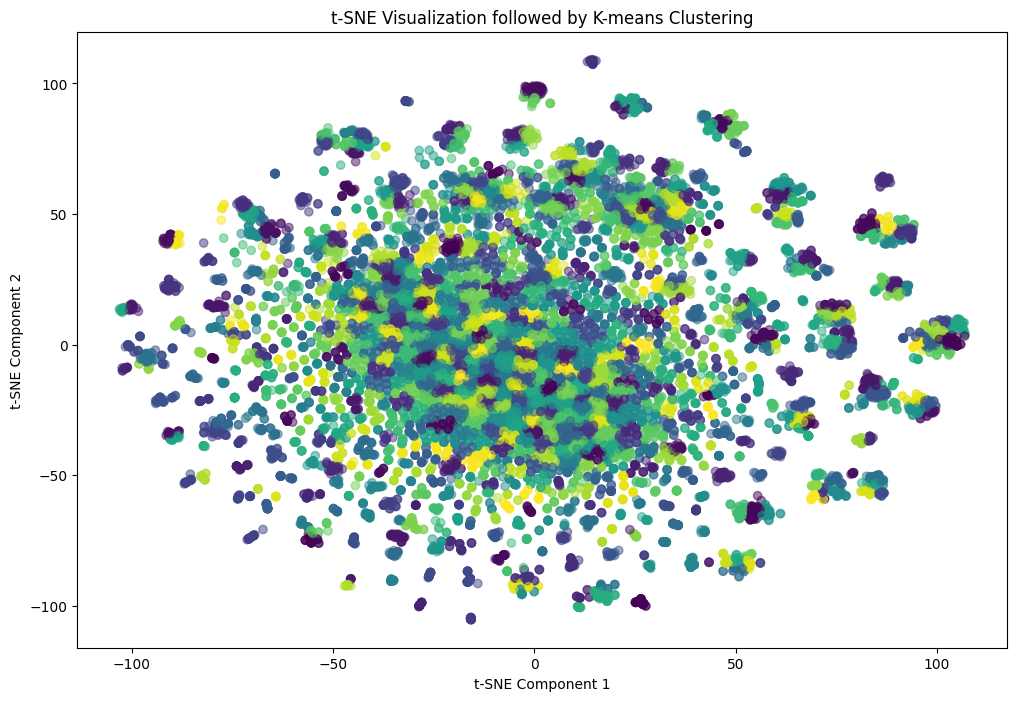

In [ ]:
# Combine the t-SNE results with the original features
tsne_df = pd.DataFrame(tsne_results, columns=['t-SNE Component 1', 't-SNE Component 2'])
combined_df = pd.concat([dataframe_imputed, tsne_df], axis=1)

# Apply K-Means on the reduced data
kmeans = KMeans(n_clusters=k, random_state=42)
combined_df['cluster'] = kmeans.fit_predict(tsne_results)

# Create a scatter plot with colors representing clusters
plt.figure(figsize=(12, 8))
plt.scatter(combined_df['t-SNE Component 1'], combined_df['t-SNE Component 2'], c=combined_df['cluster'], cmap='viridis', alpha=0.5)
plt.title('t-SNE Visualization followed by K-means Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

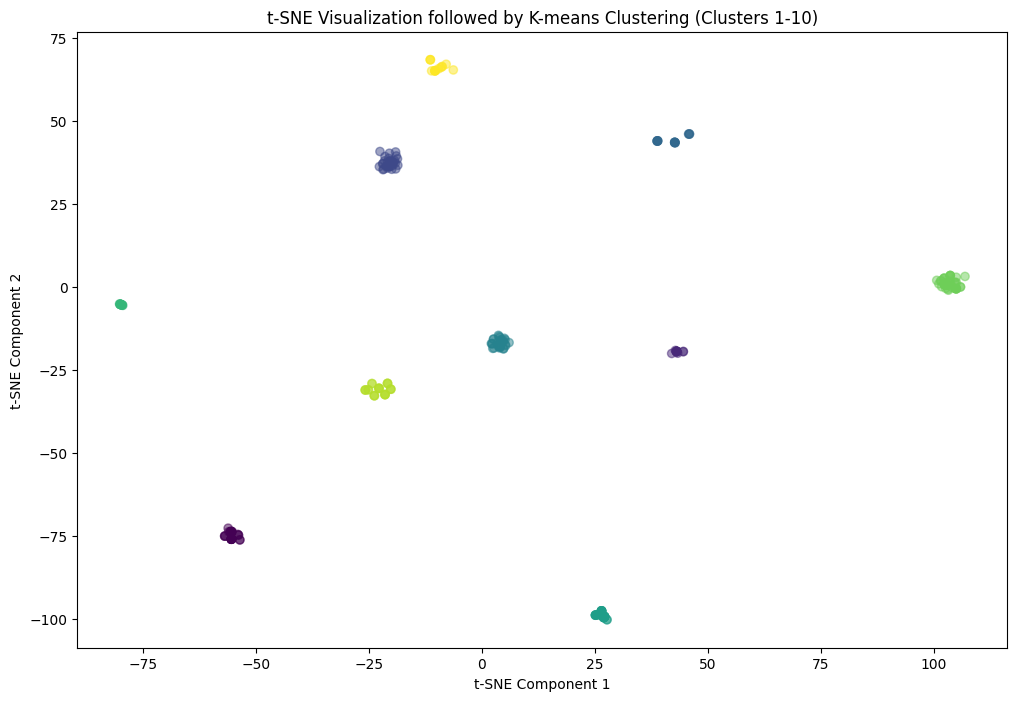

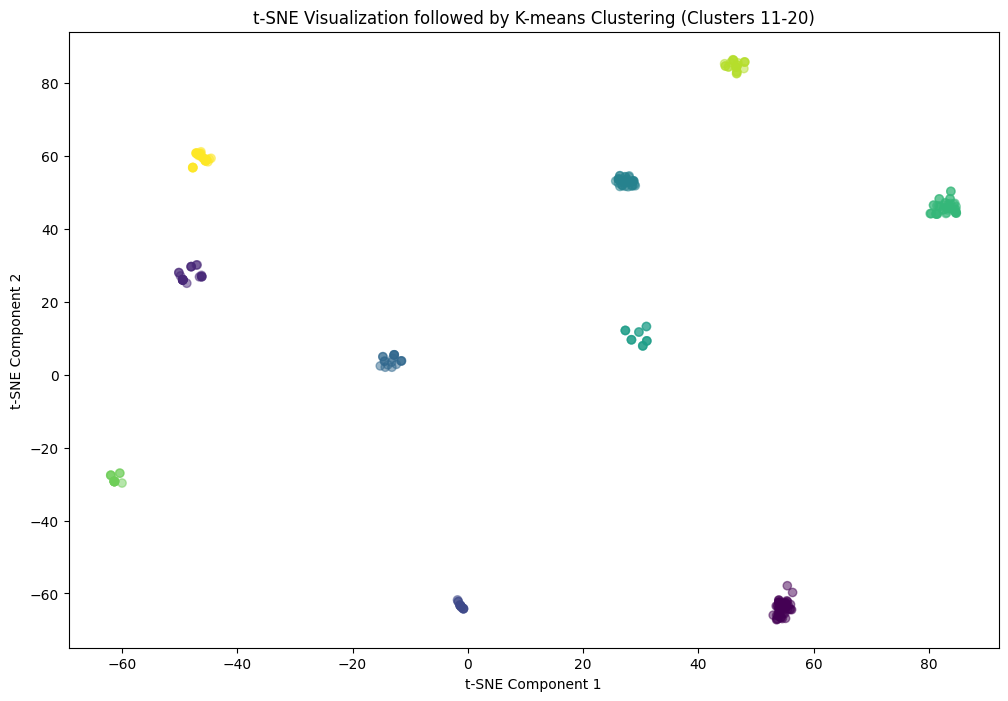

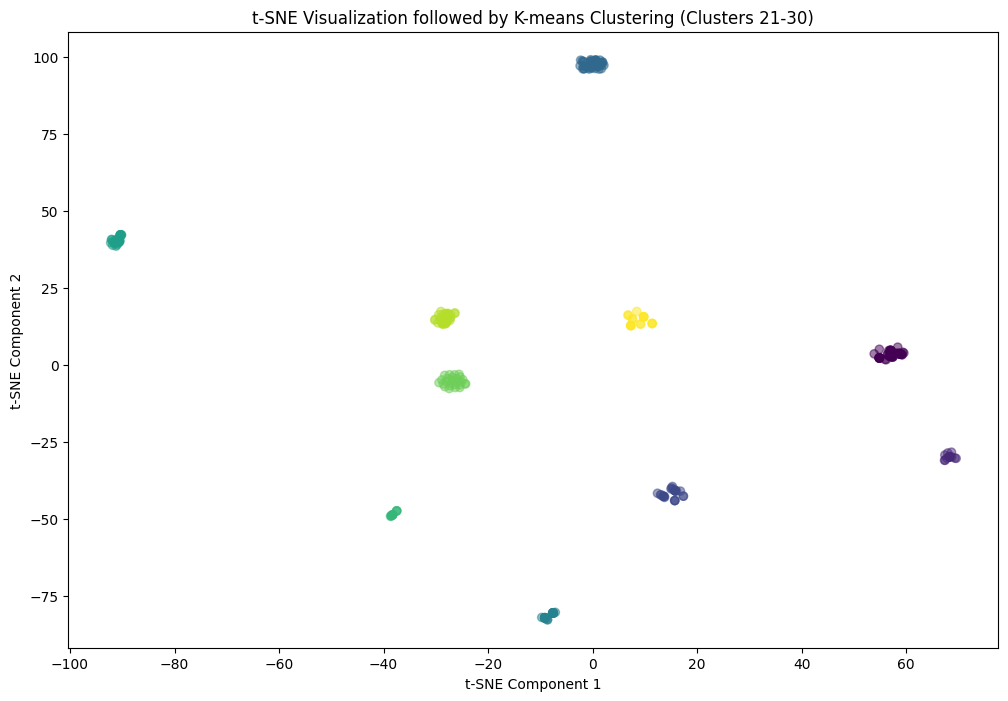

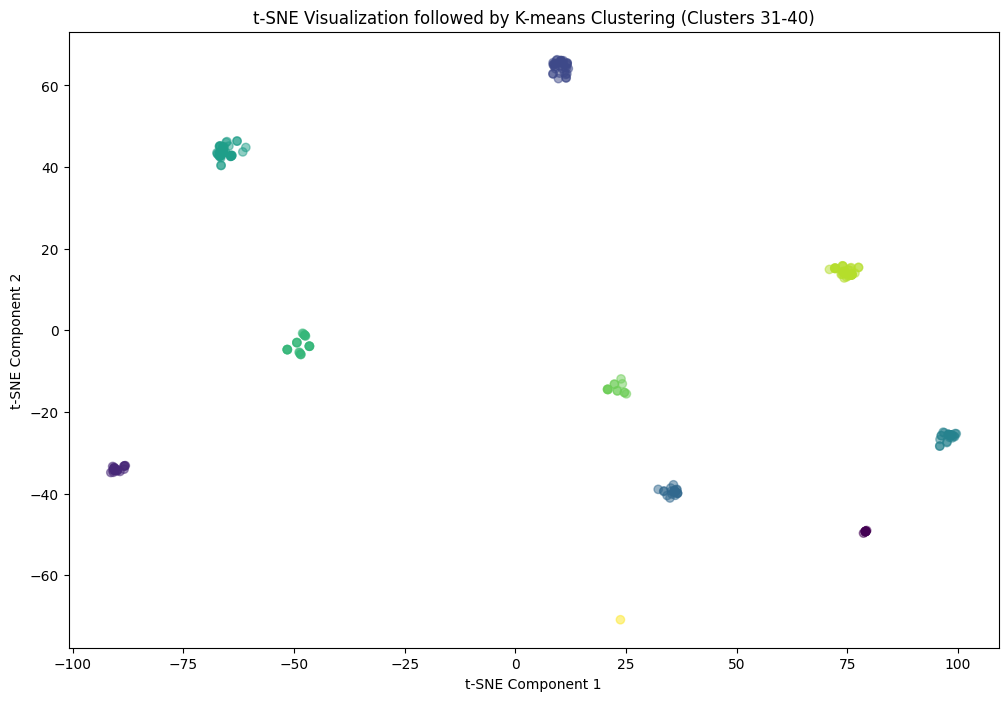

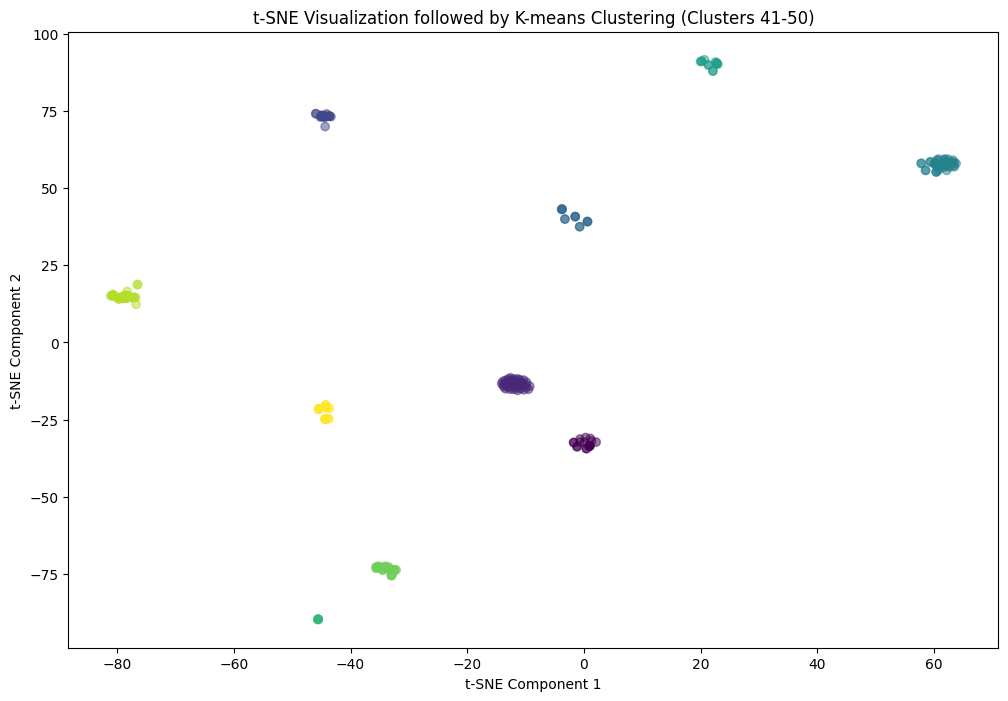

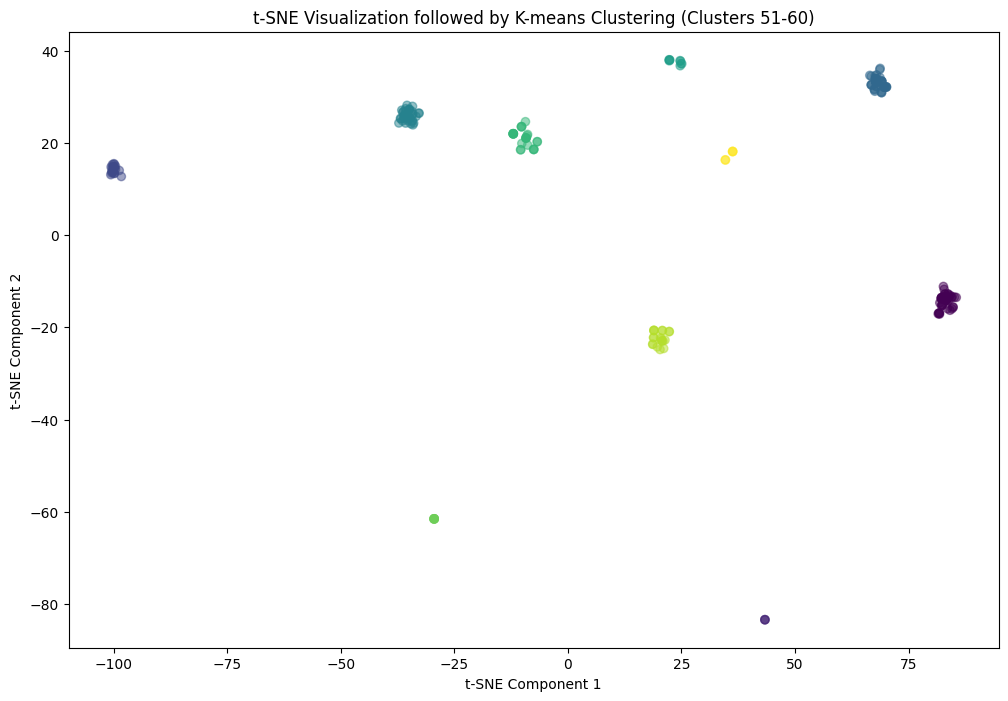

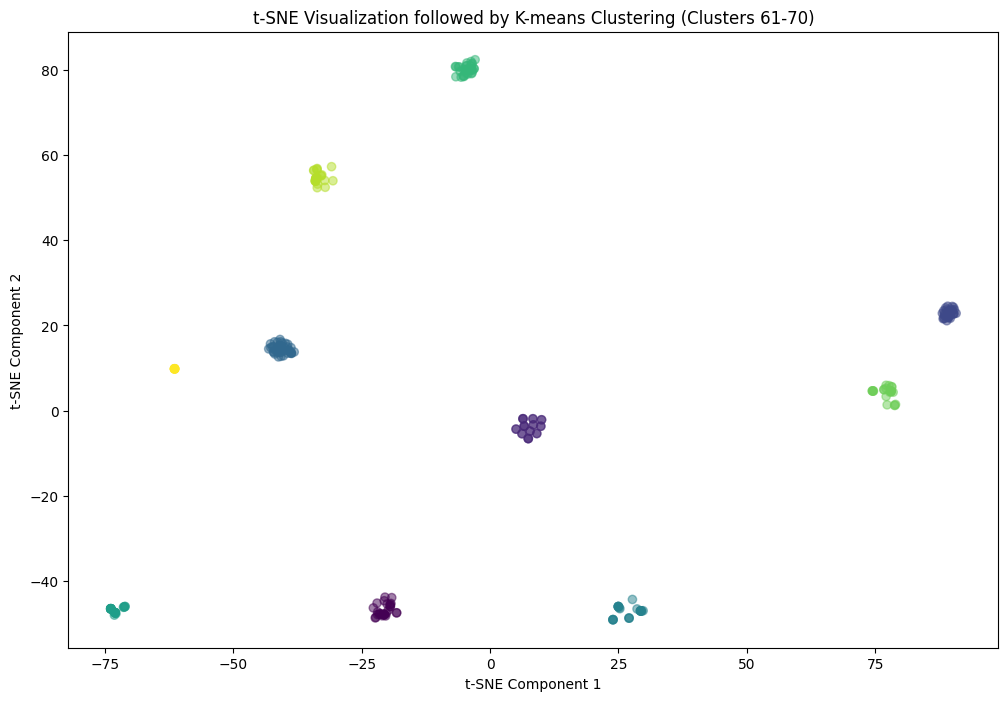

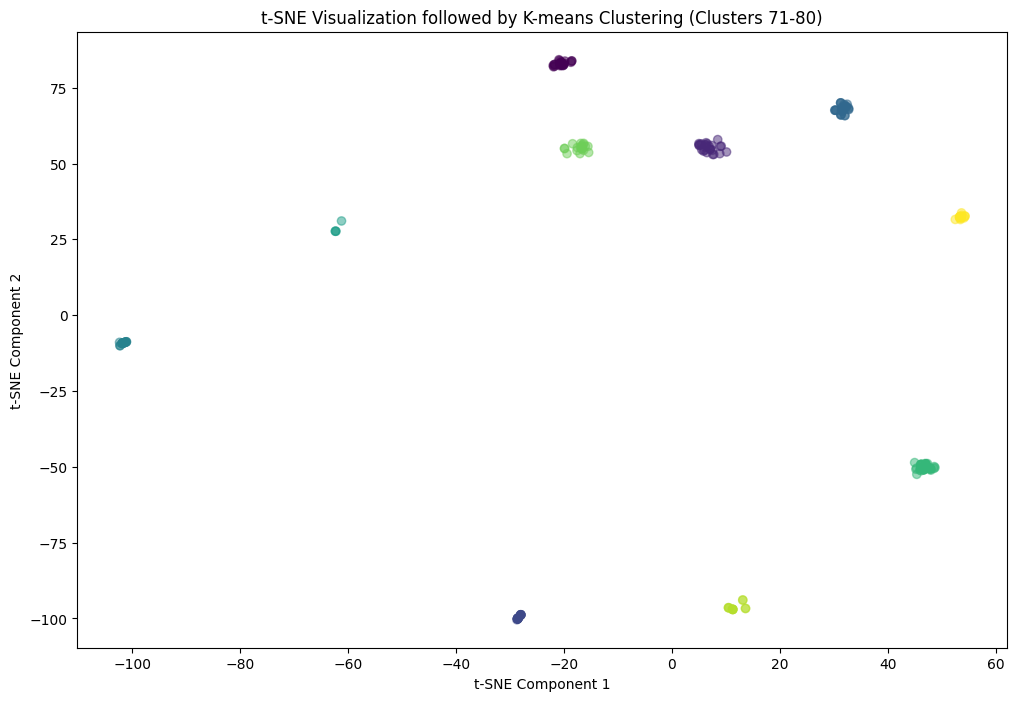

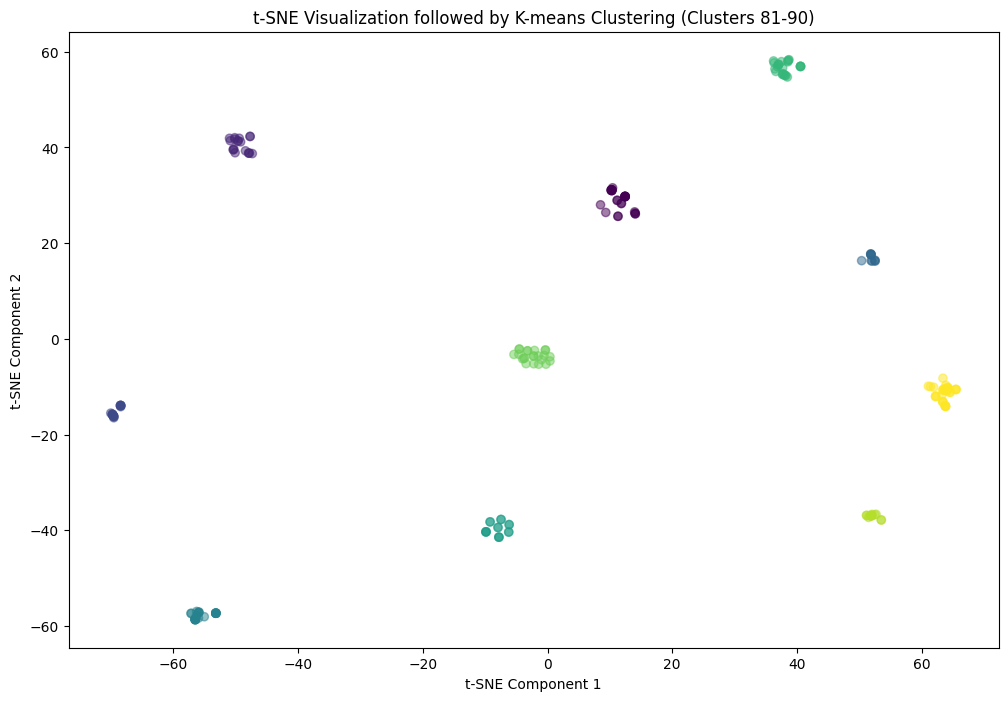

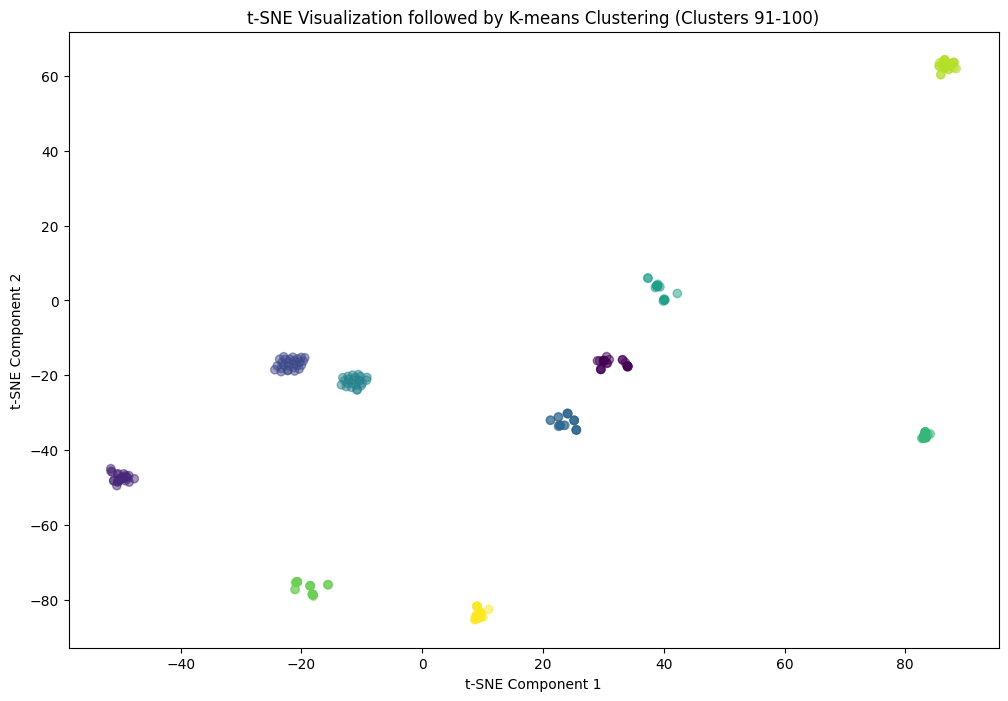

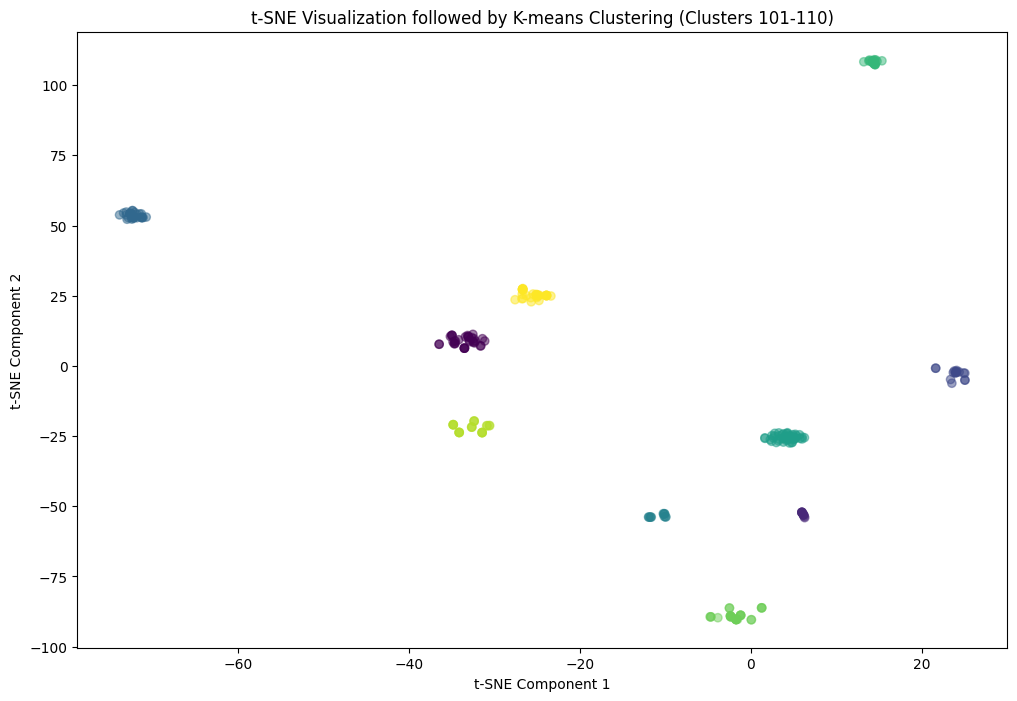

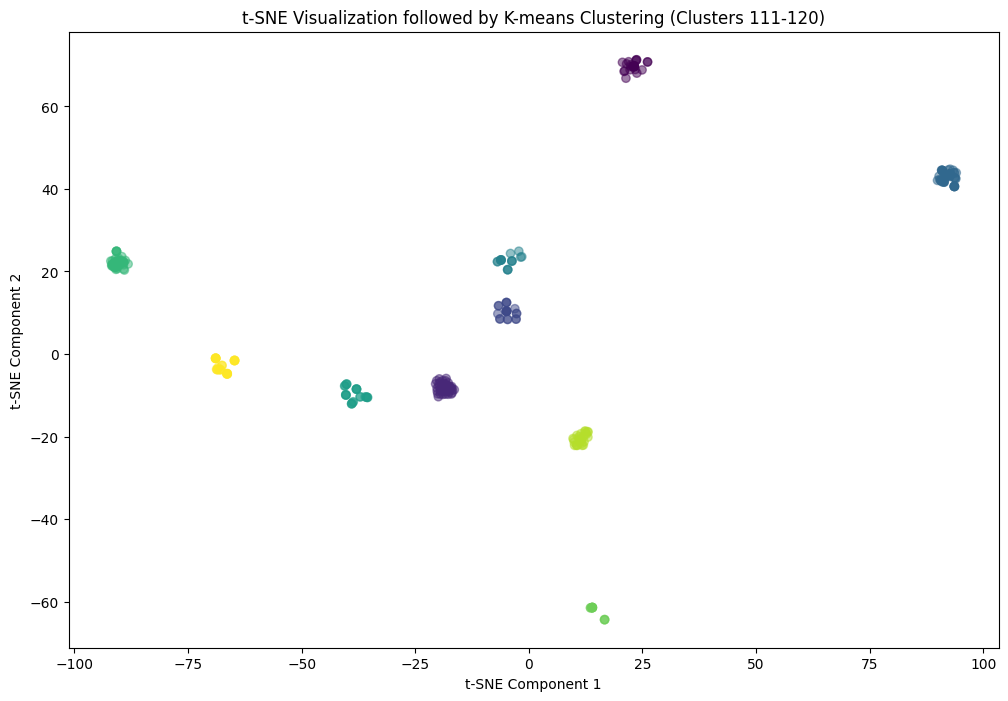

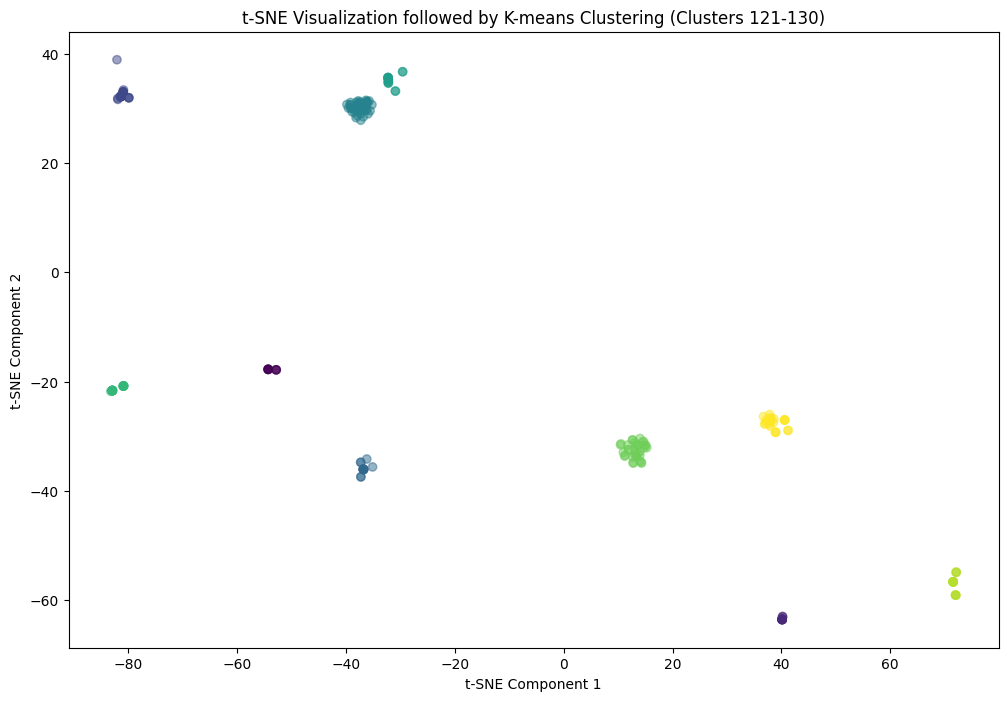

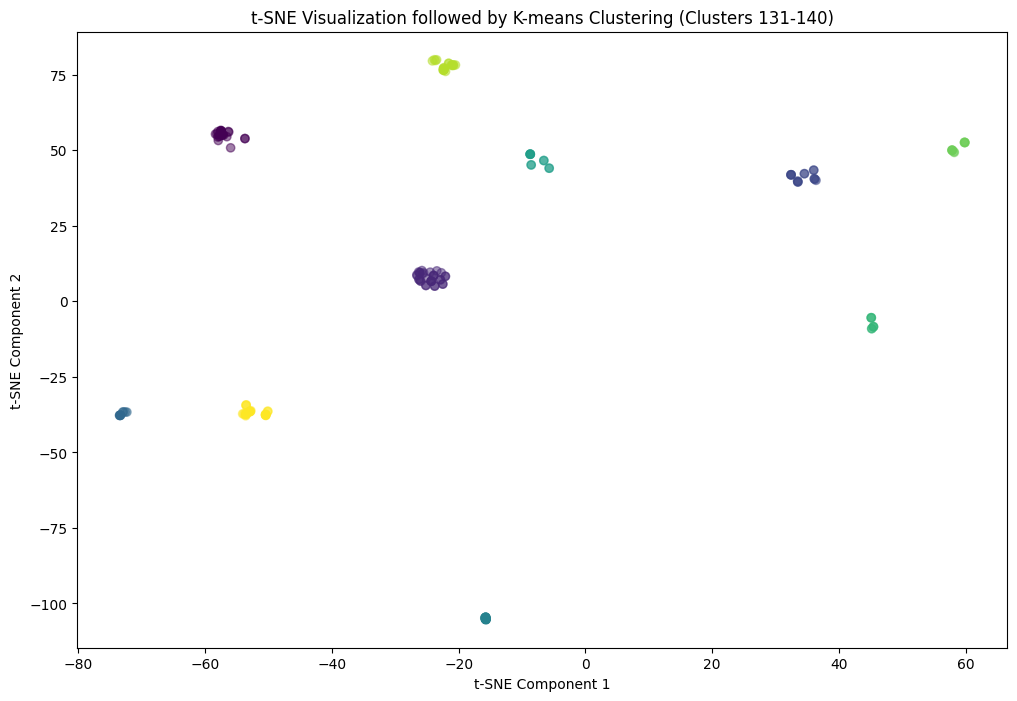

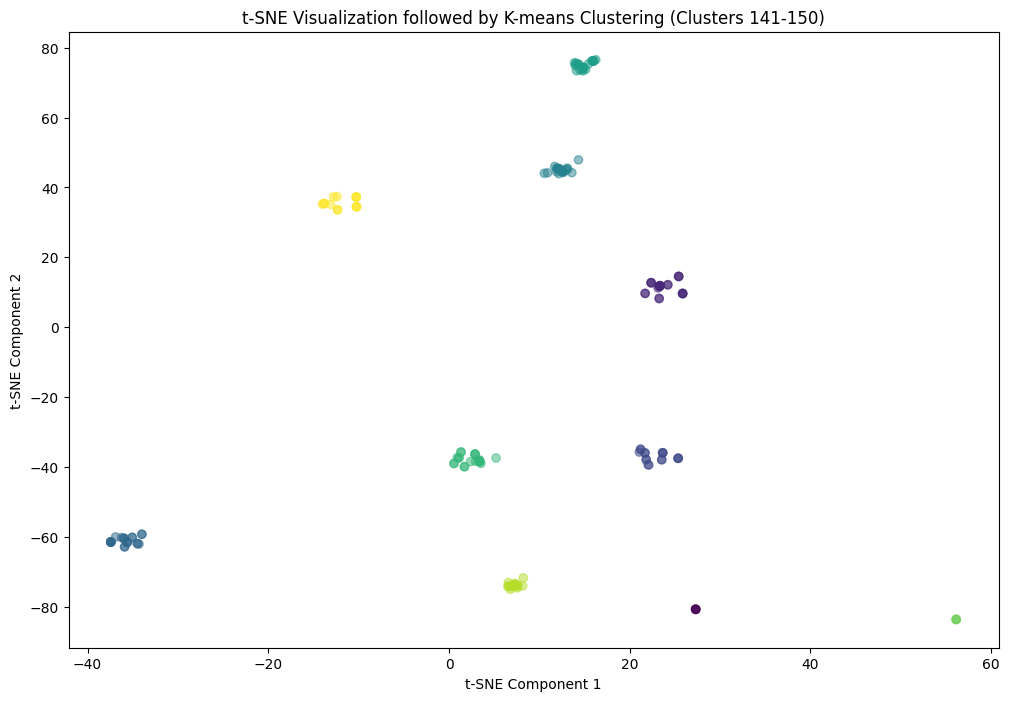

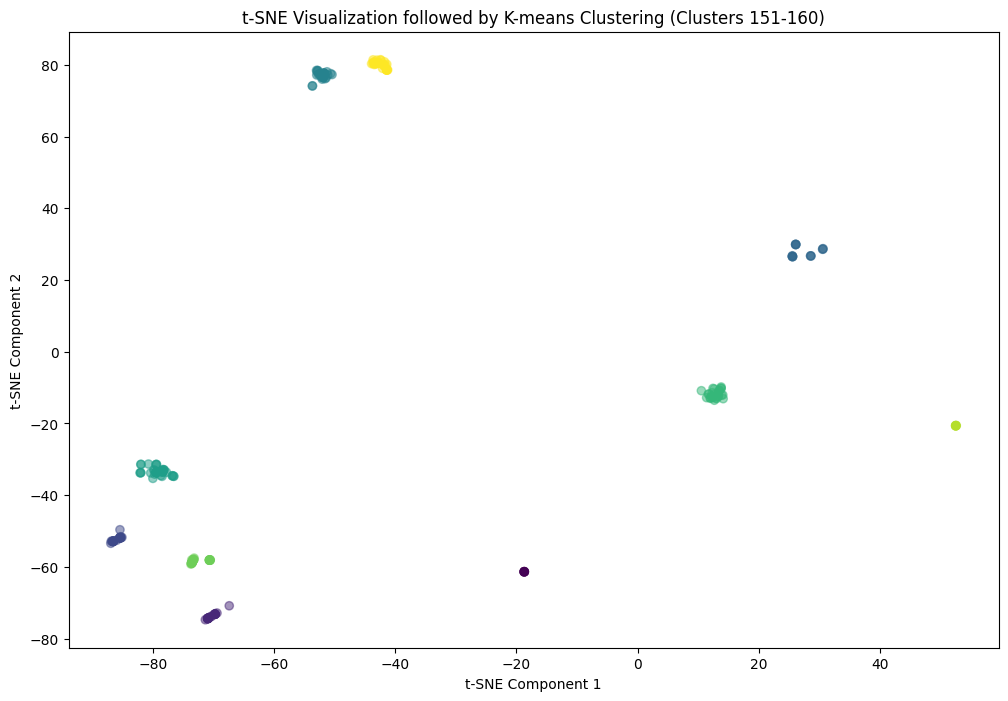

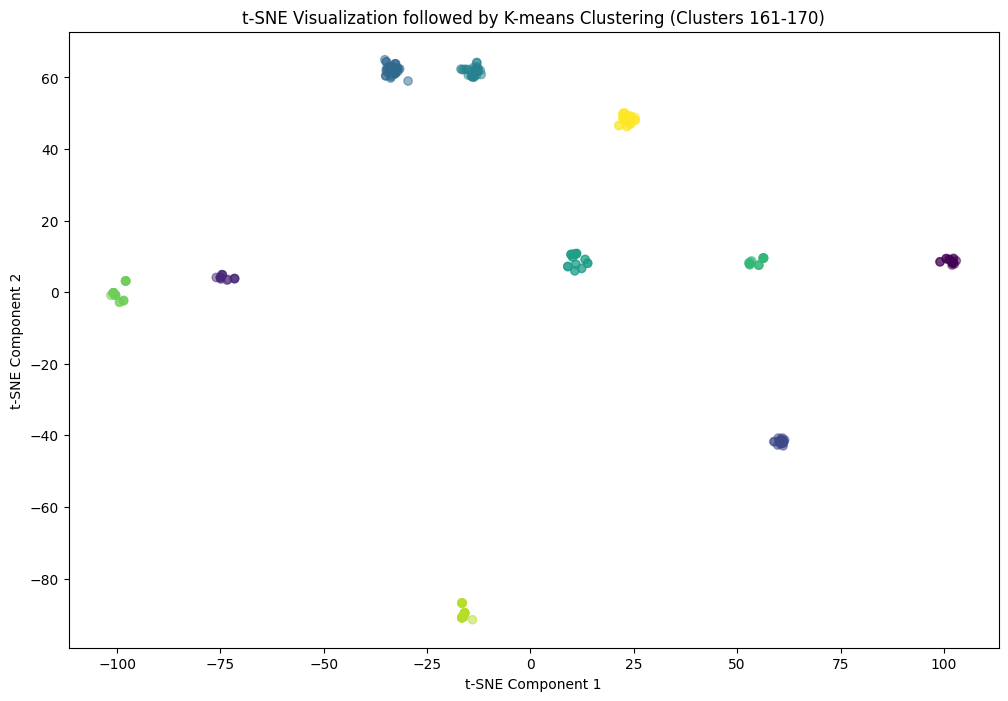

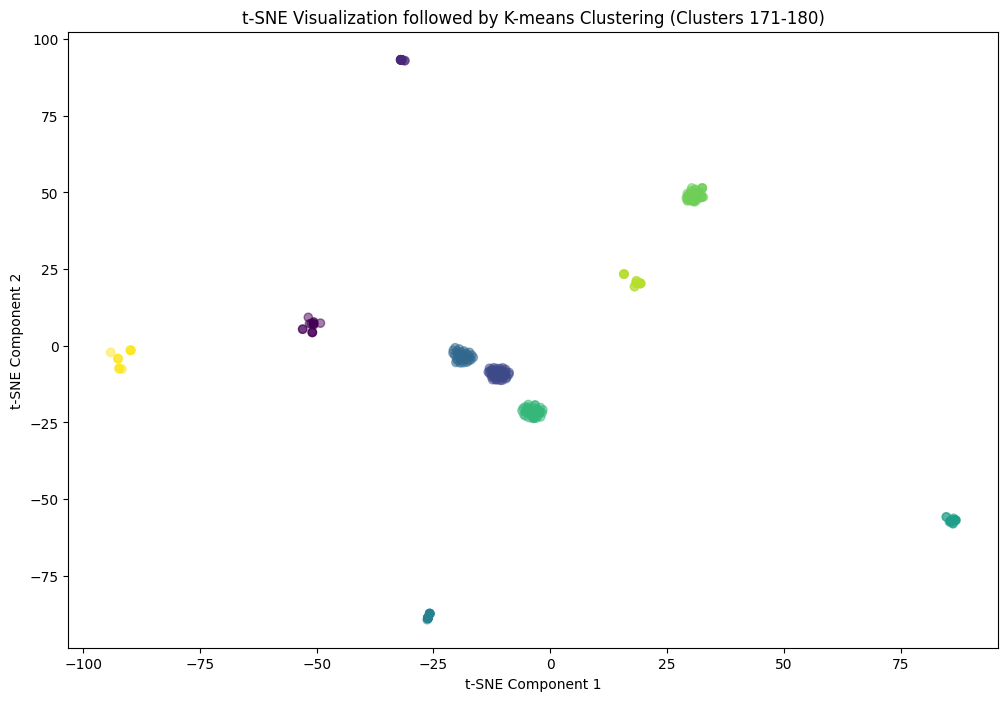

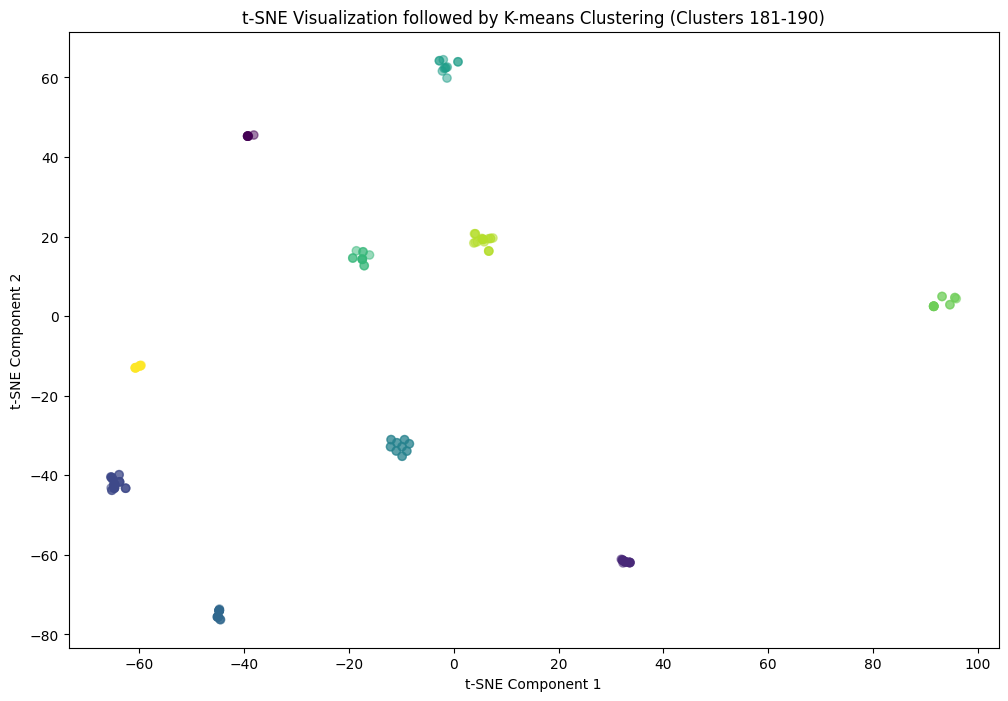

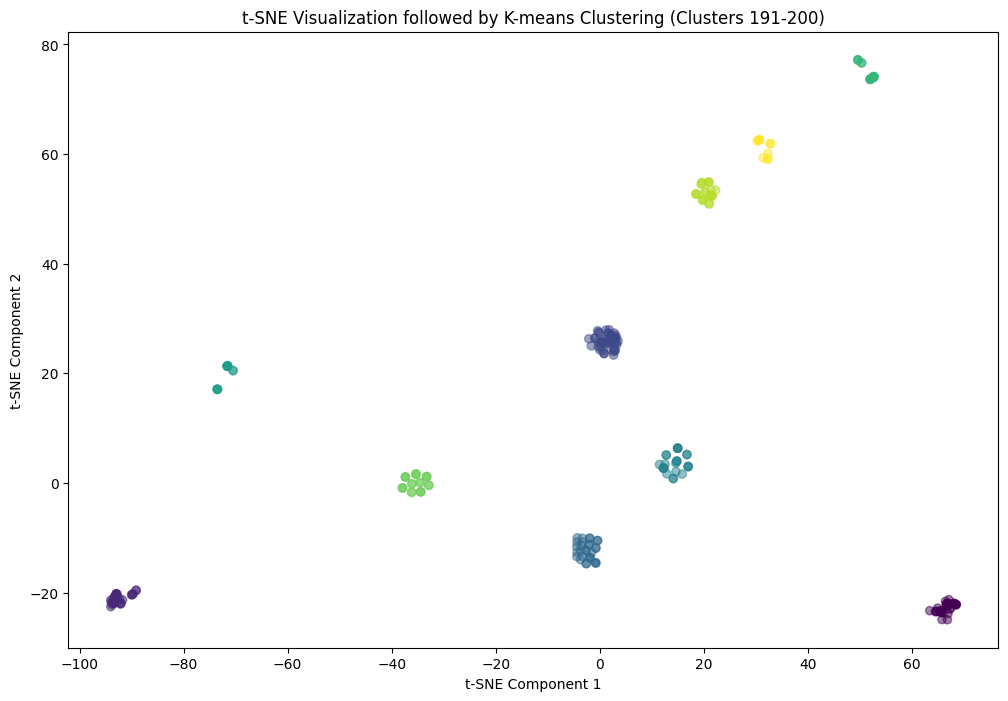

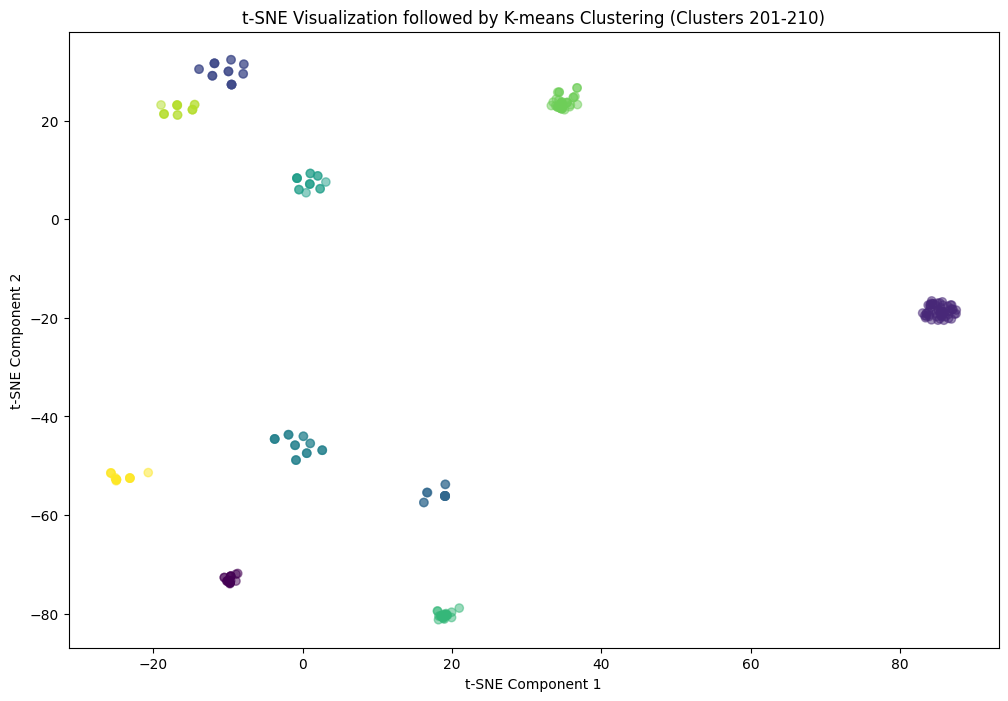

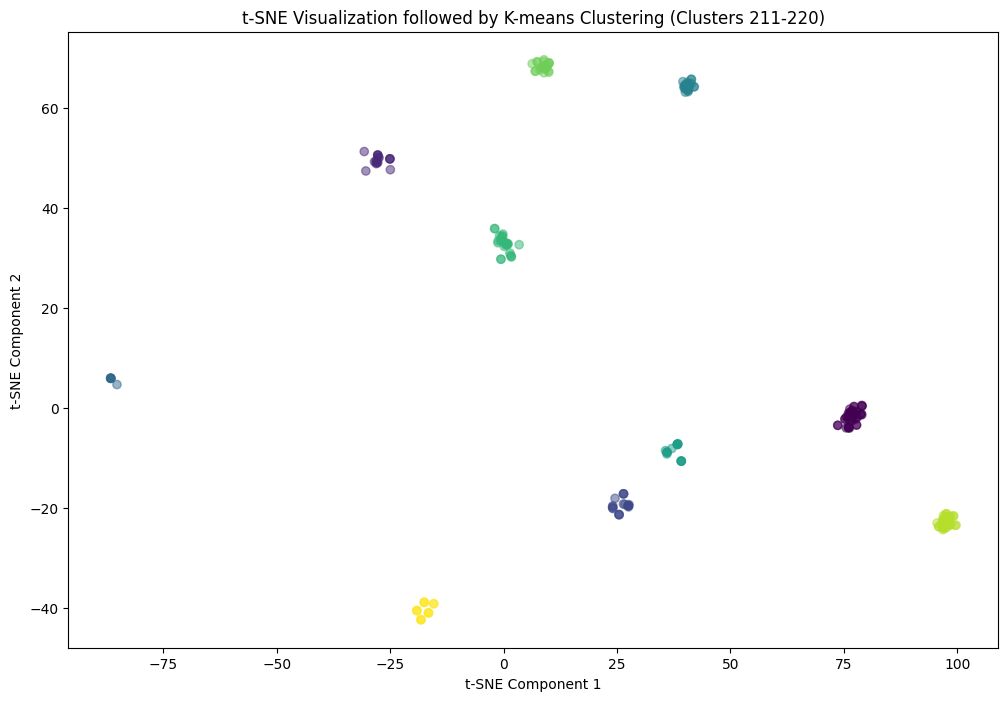

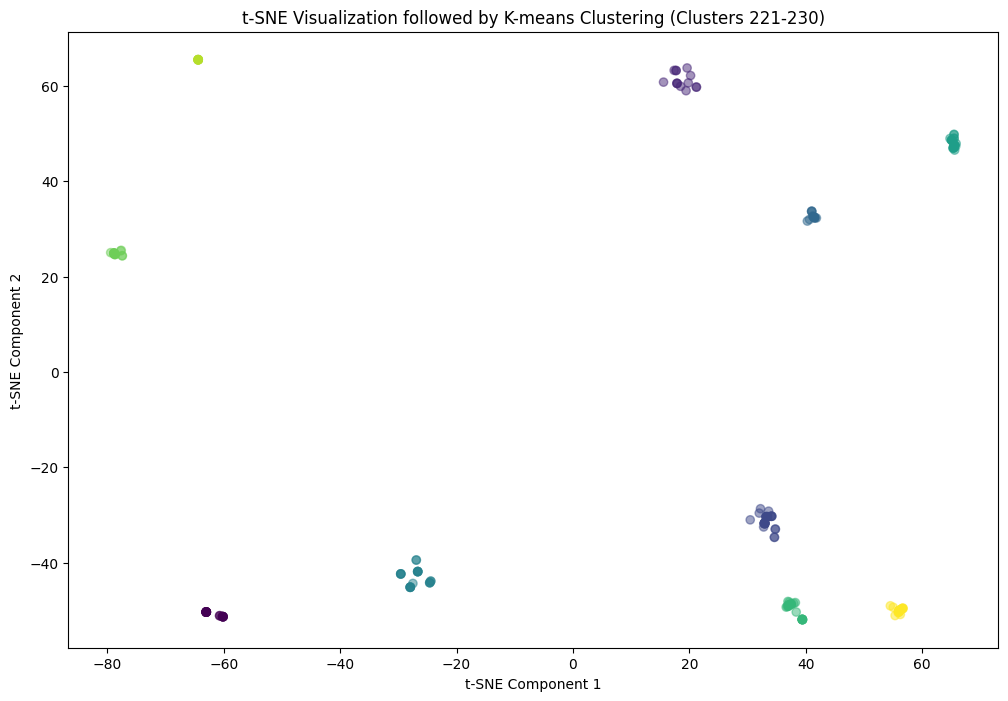

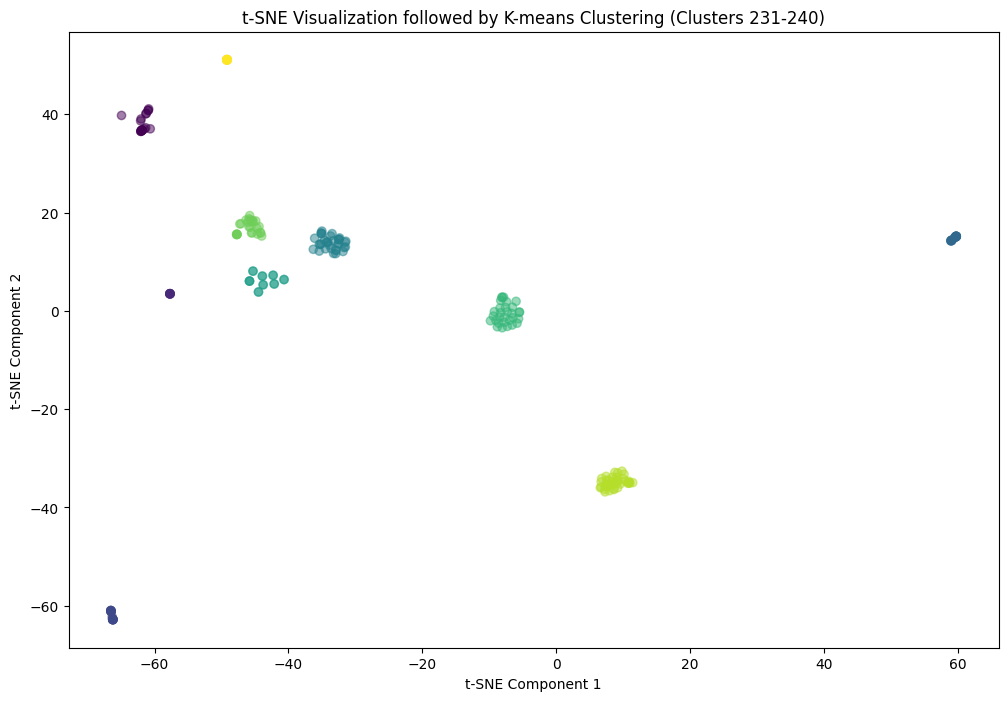

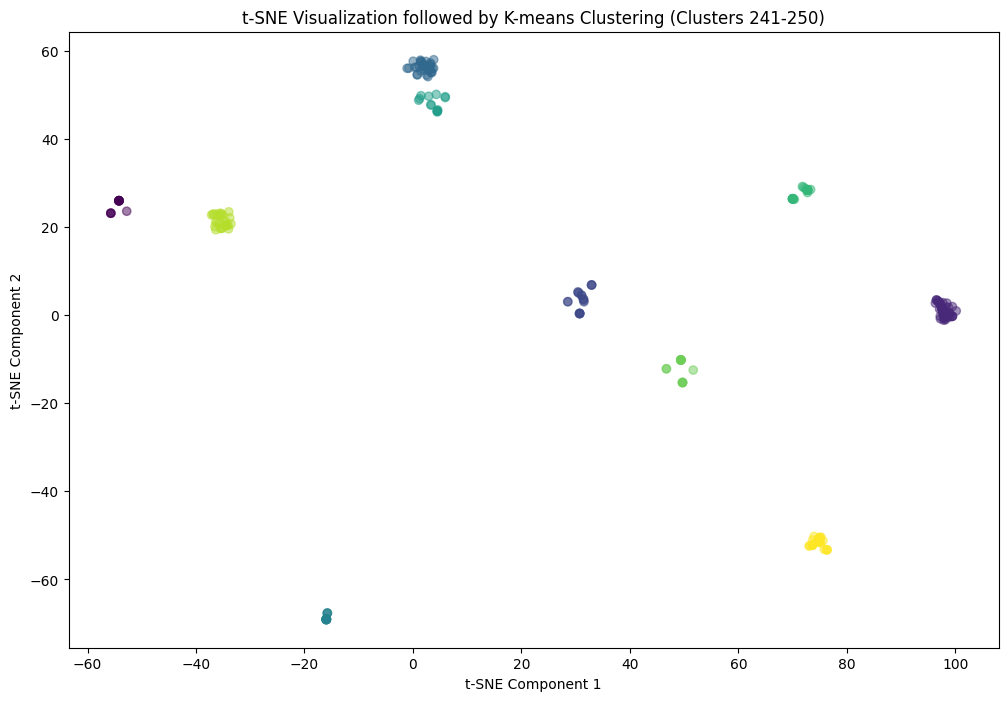

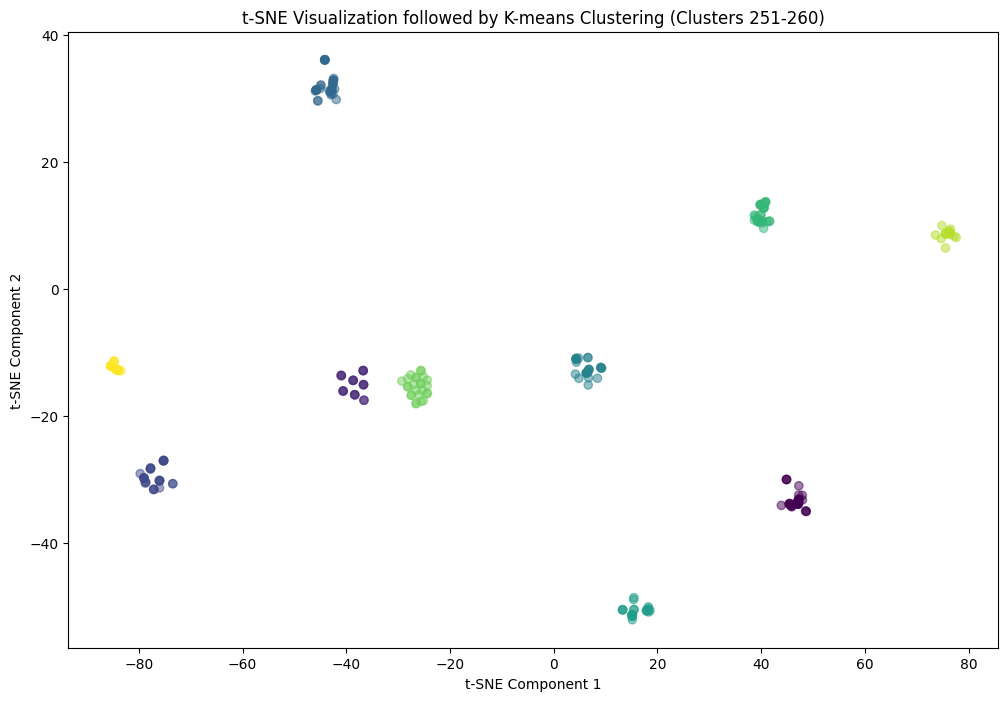

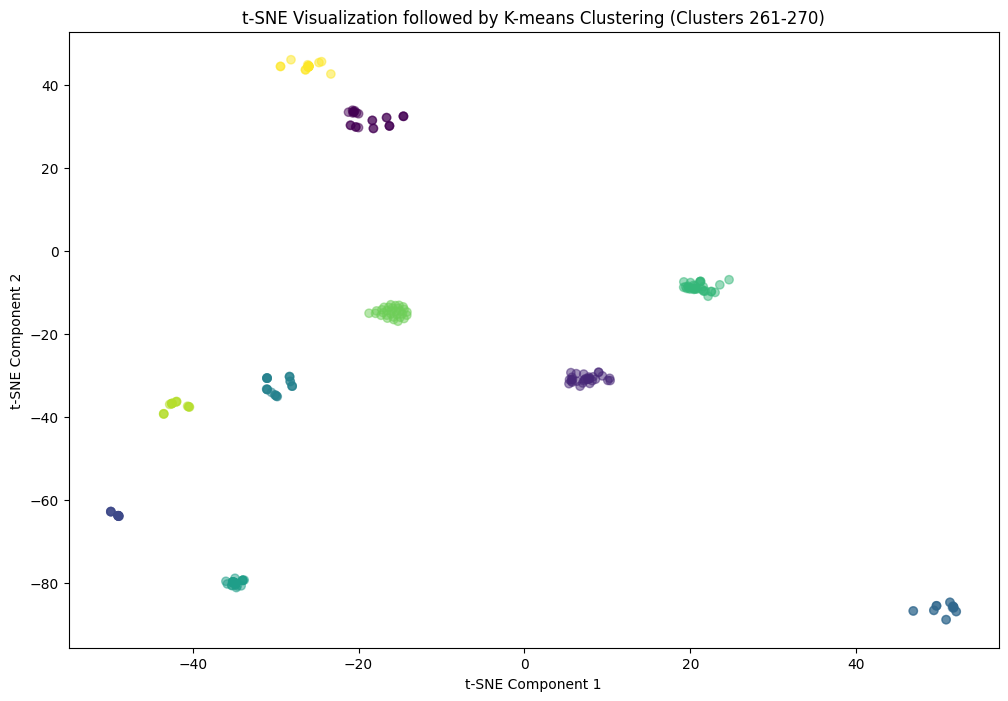

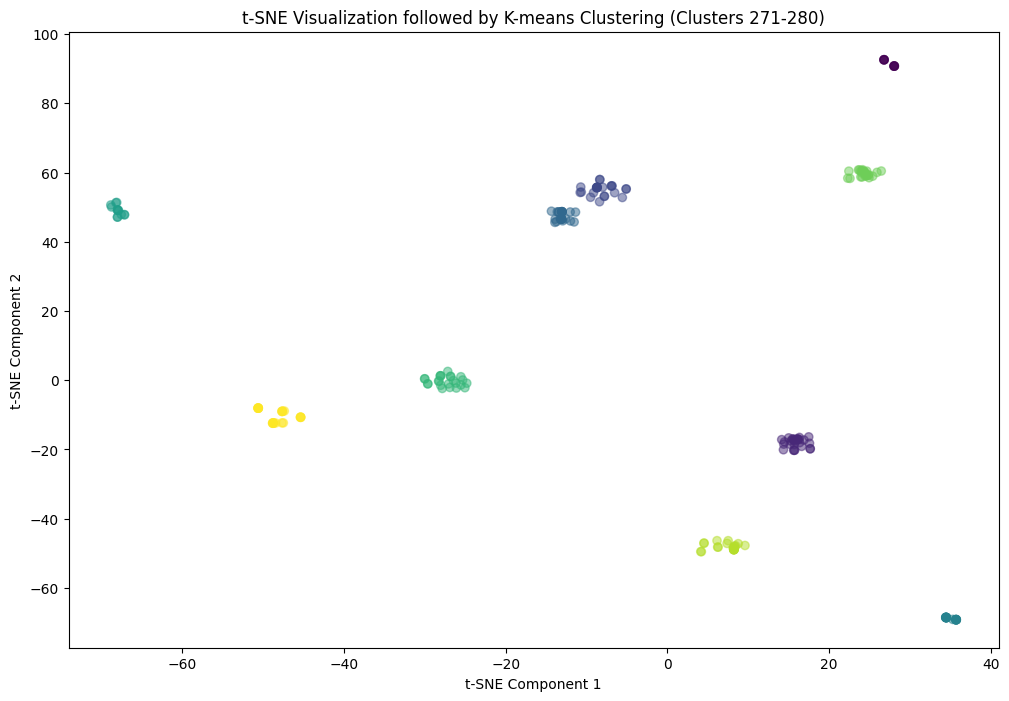

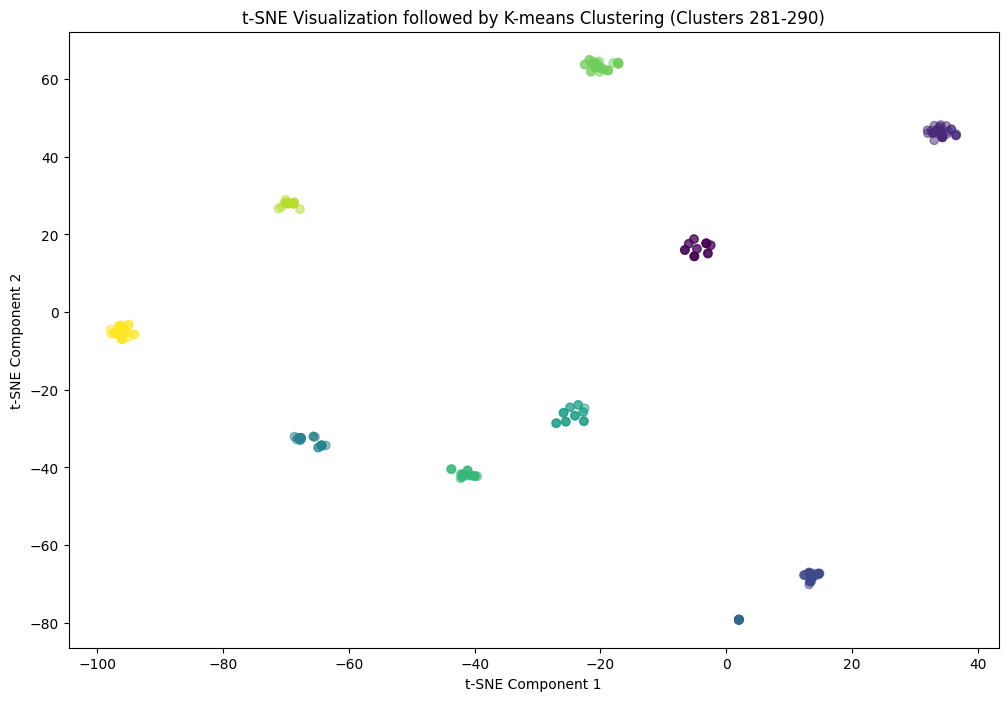

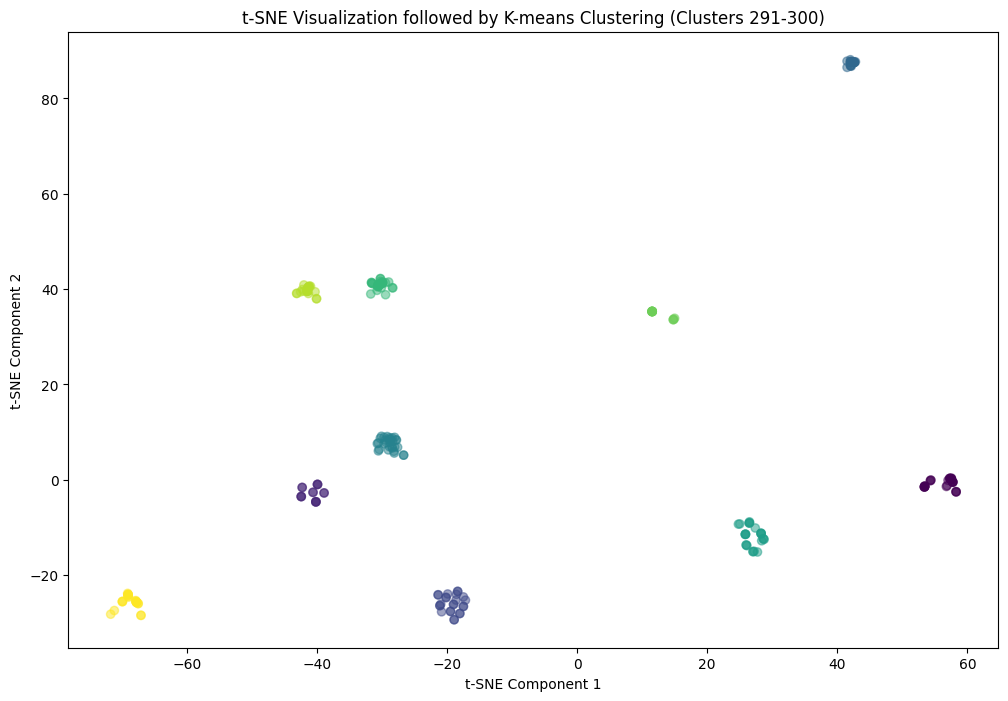

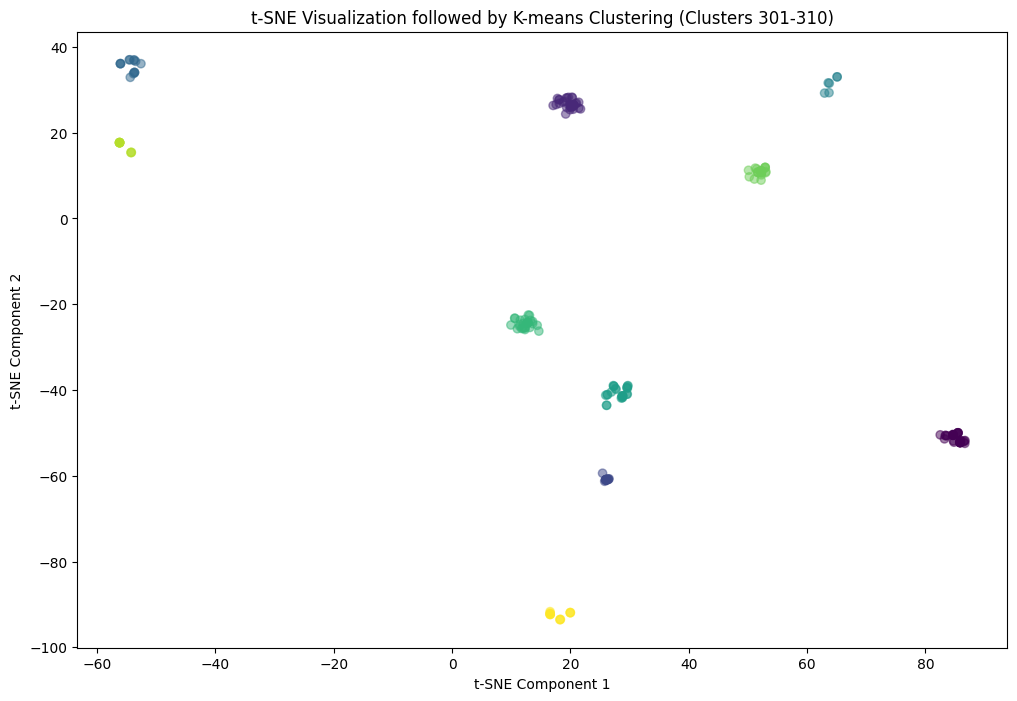

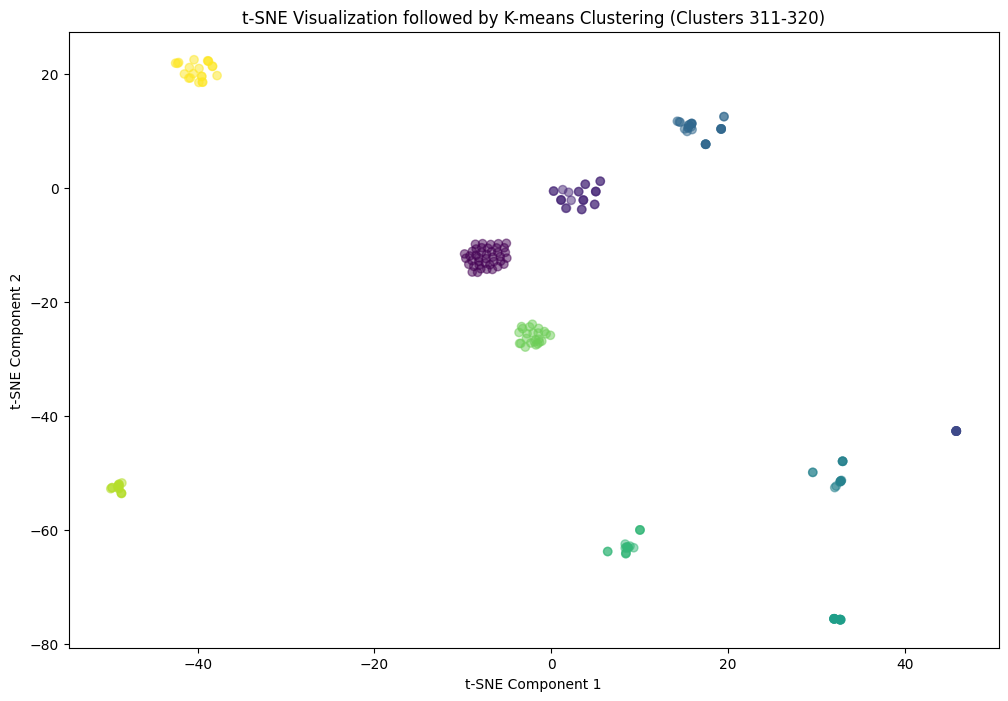

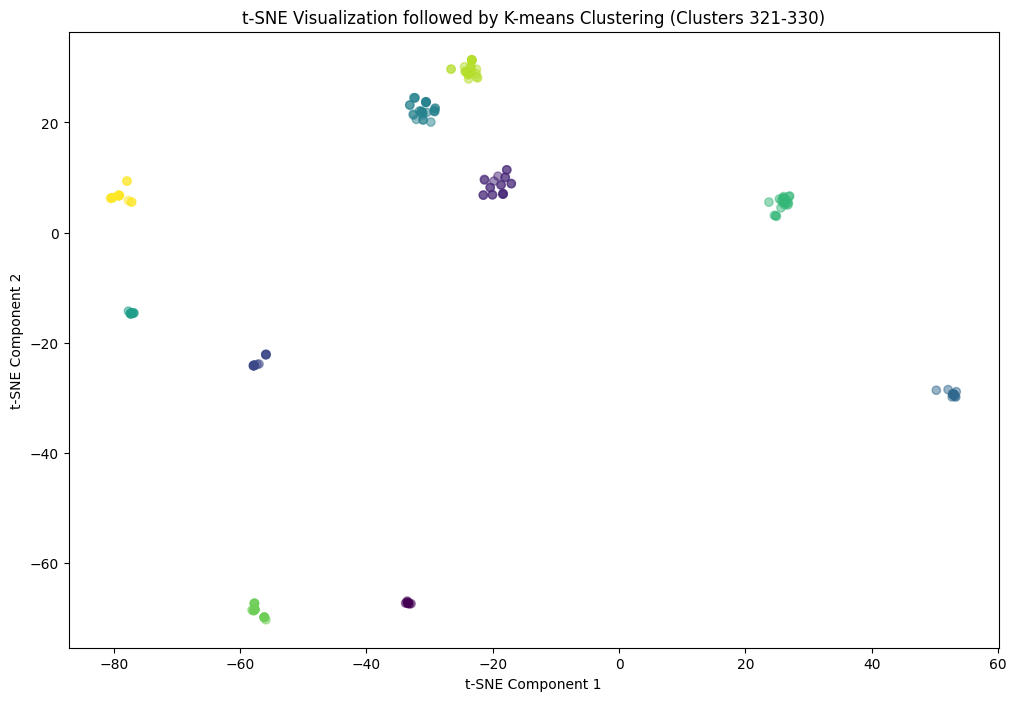

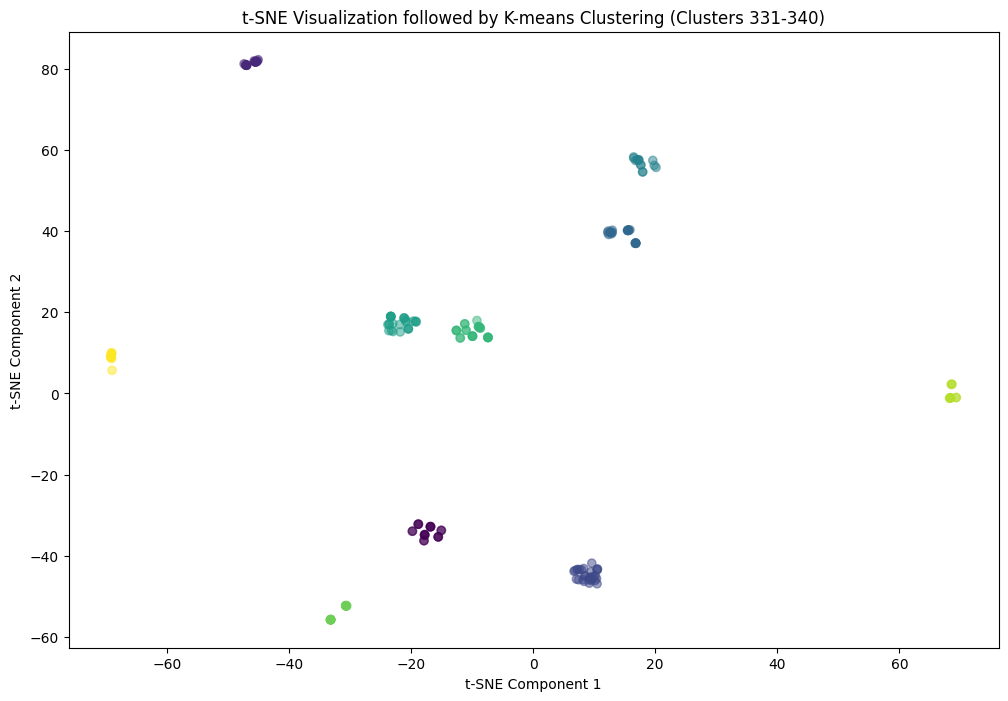

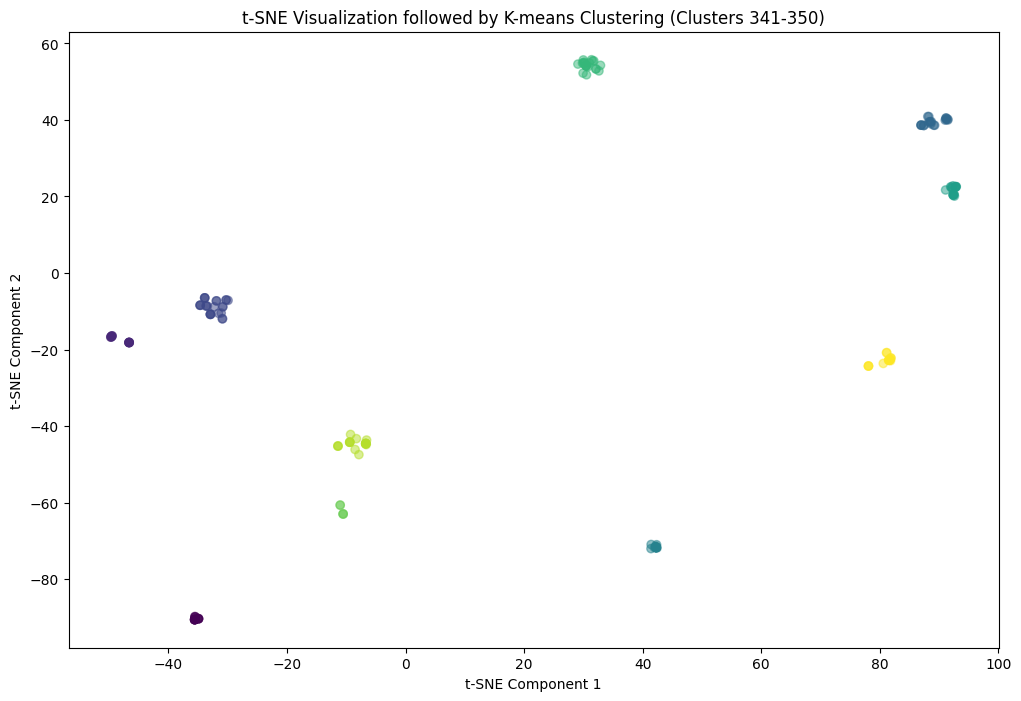

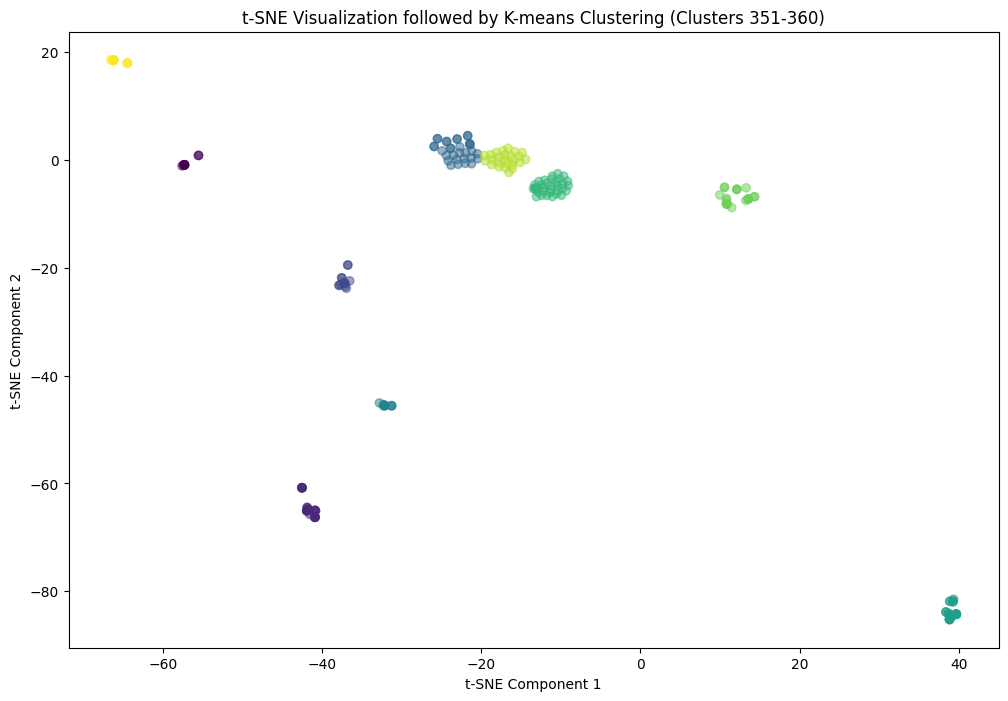

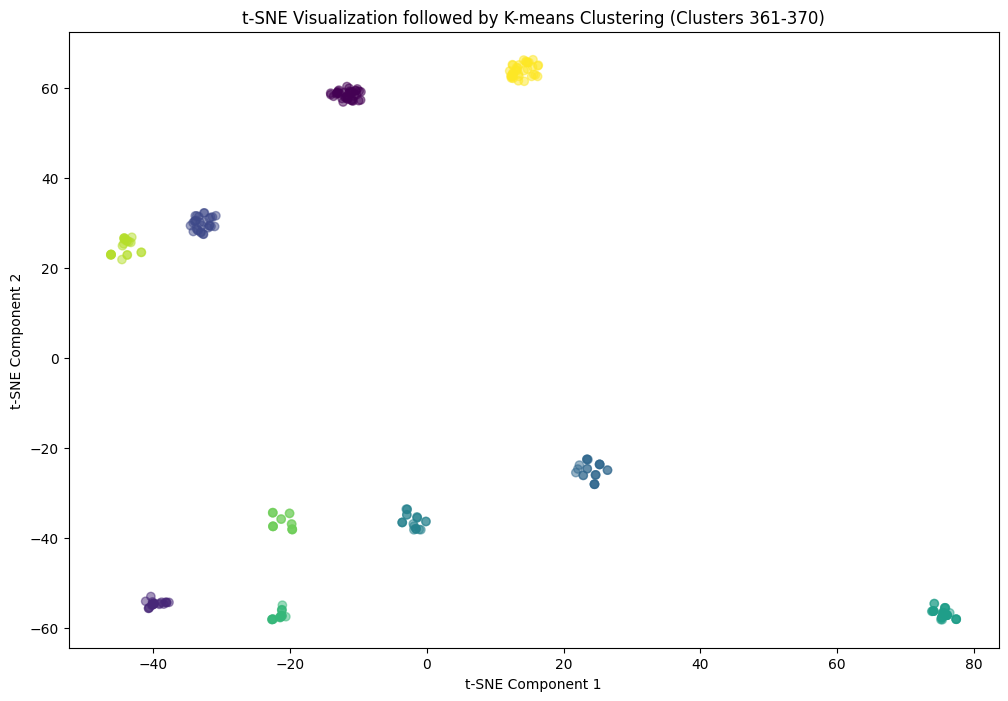

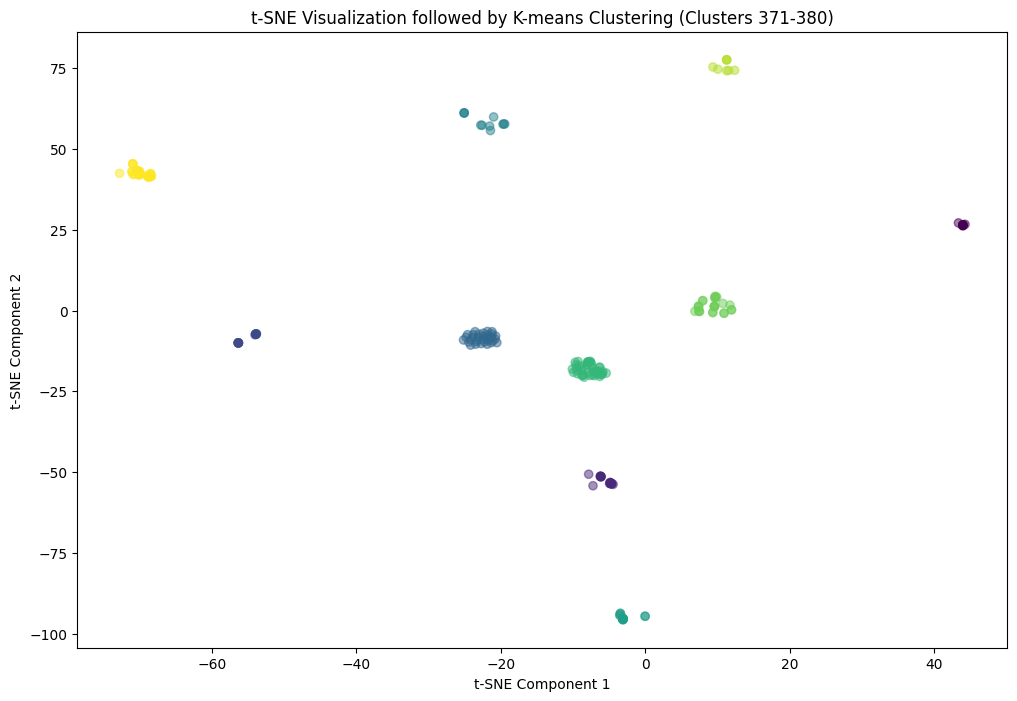

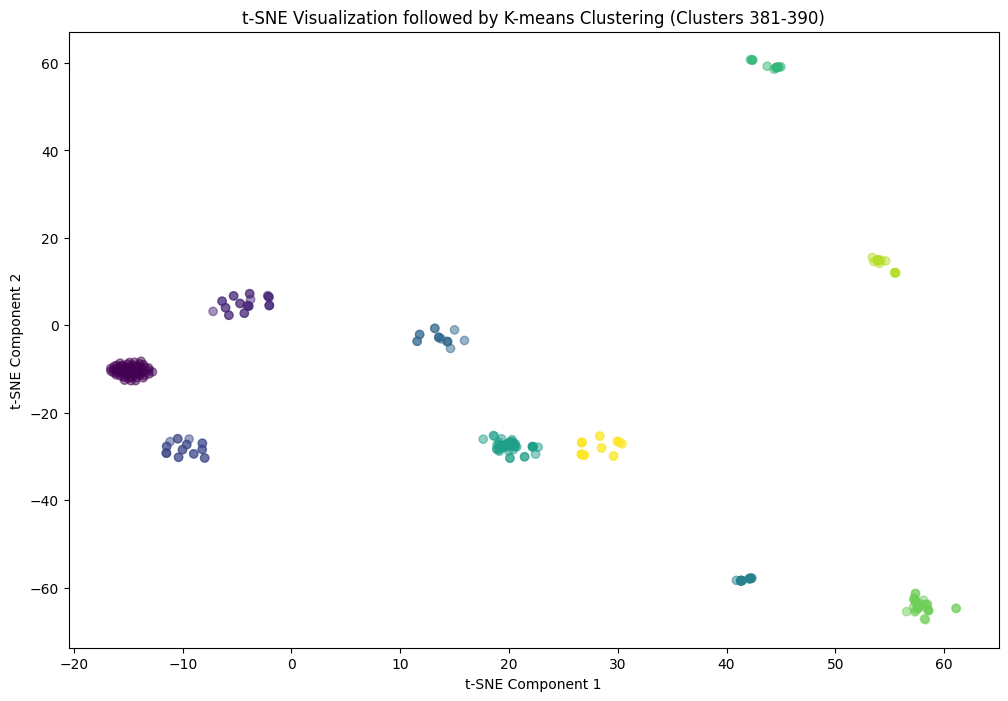

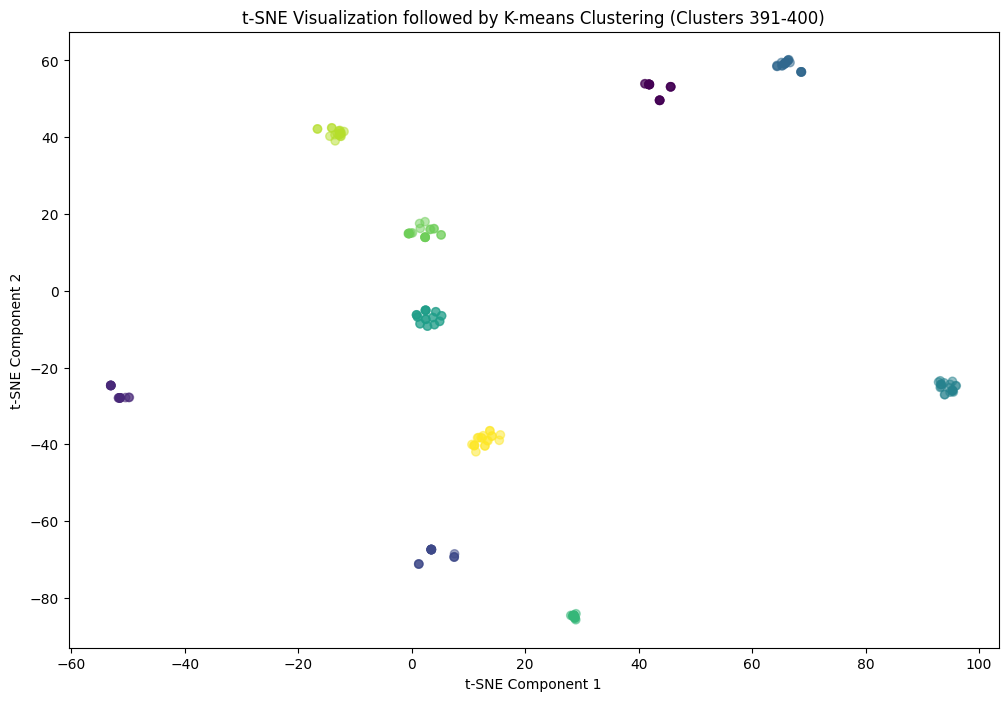

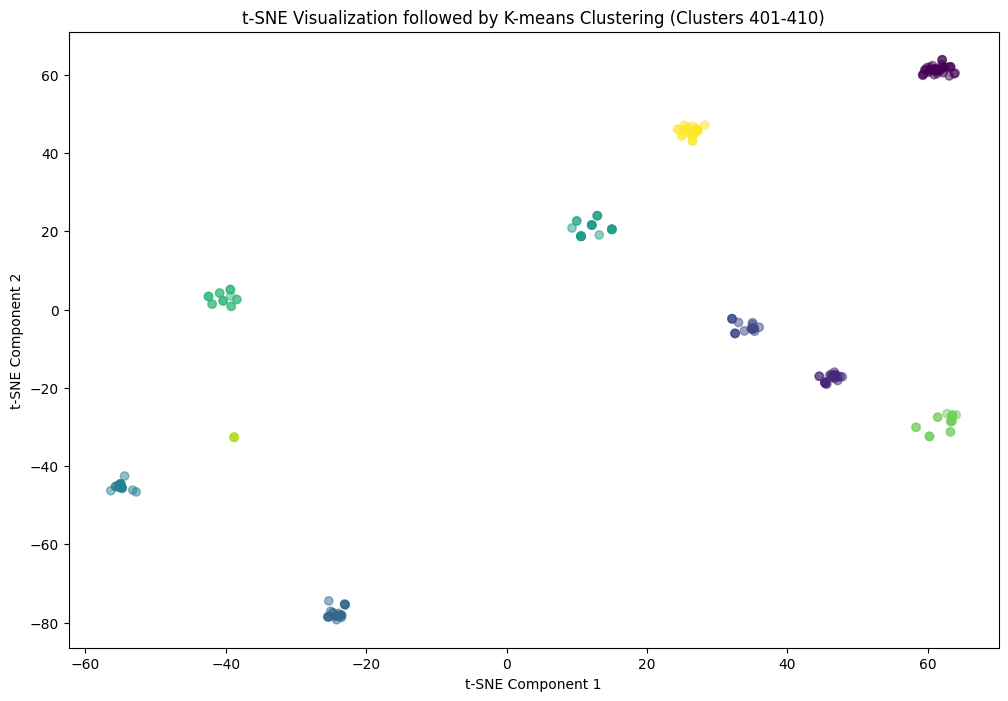

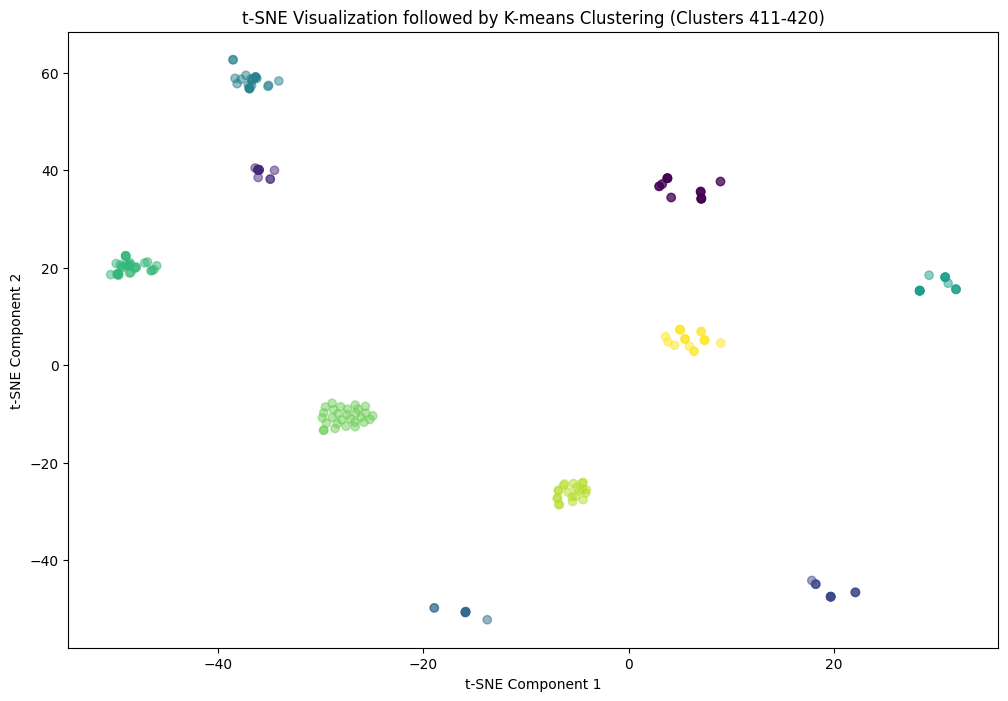

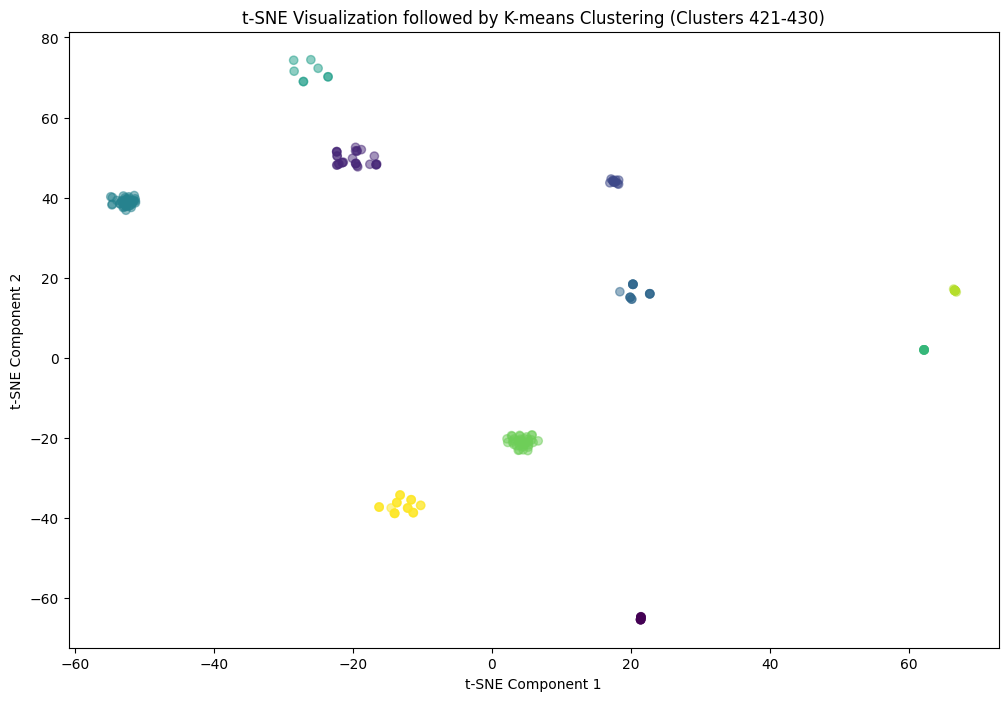

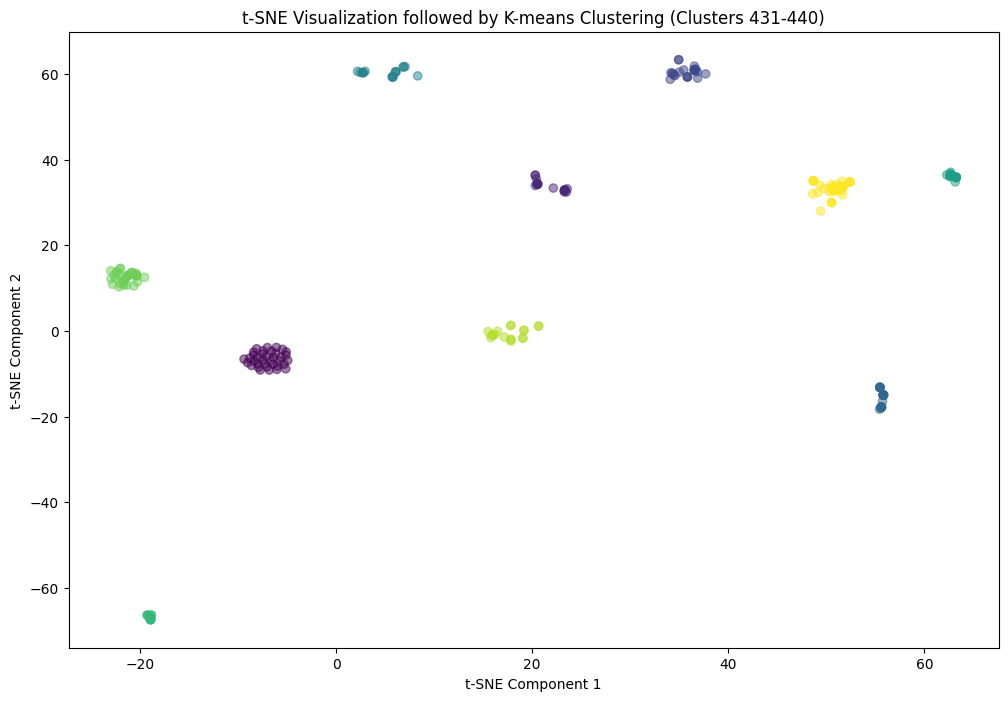

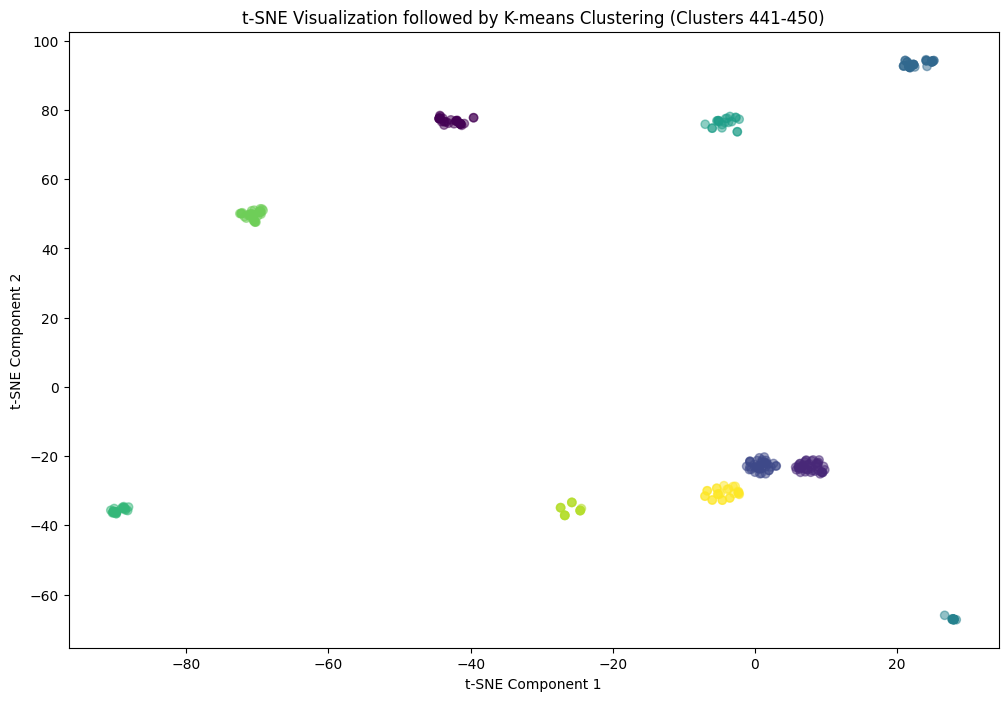

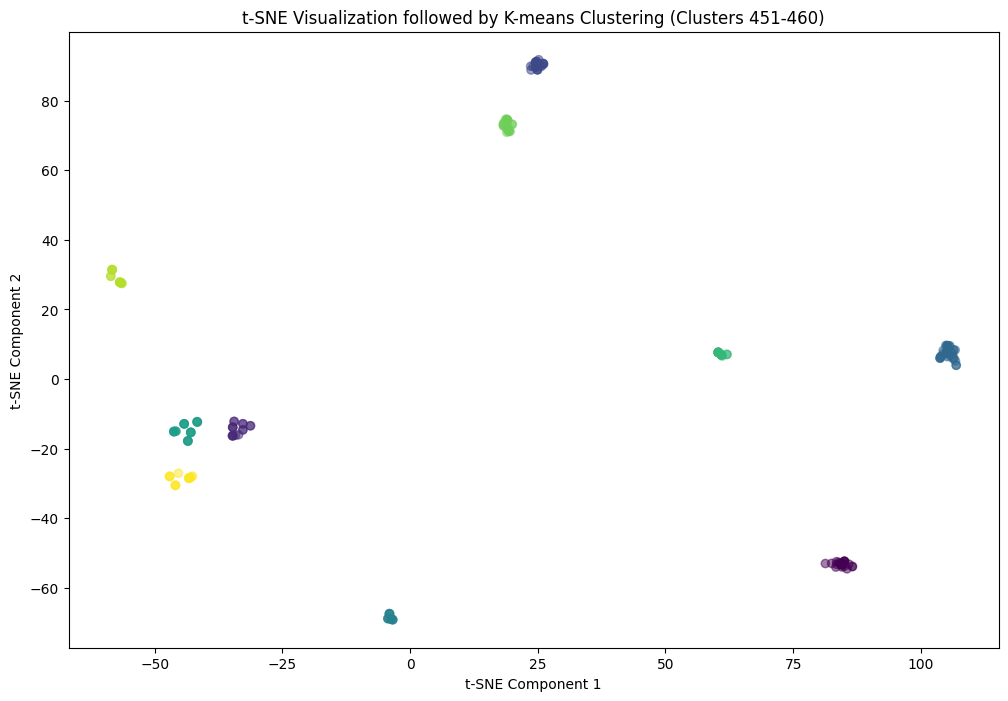

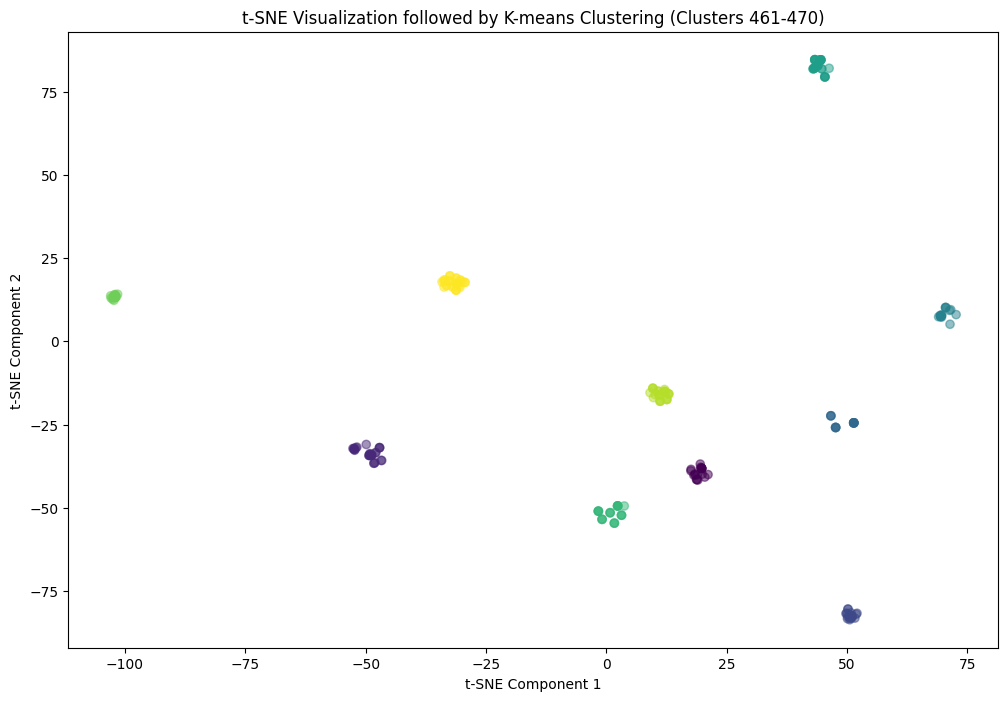

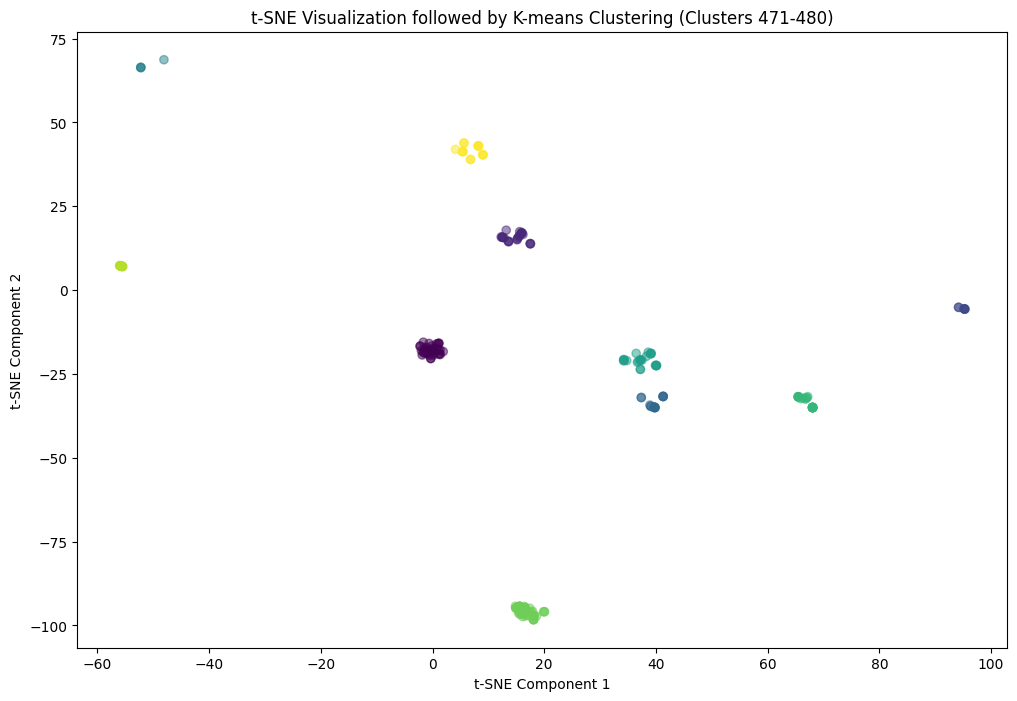

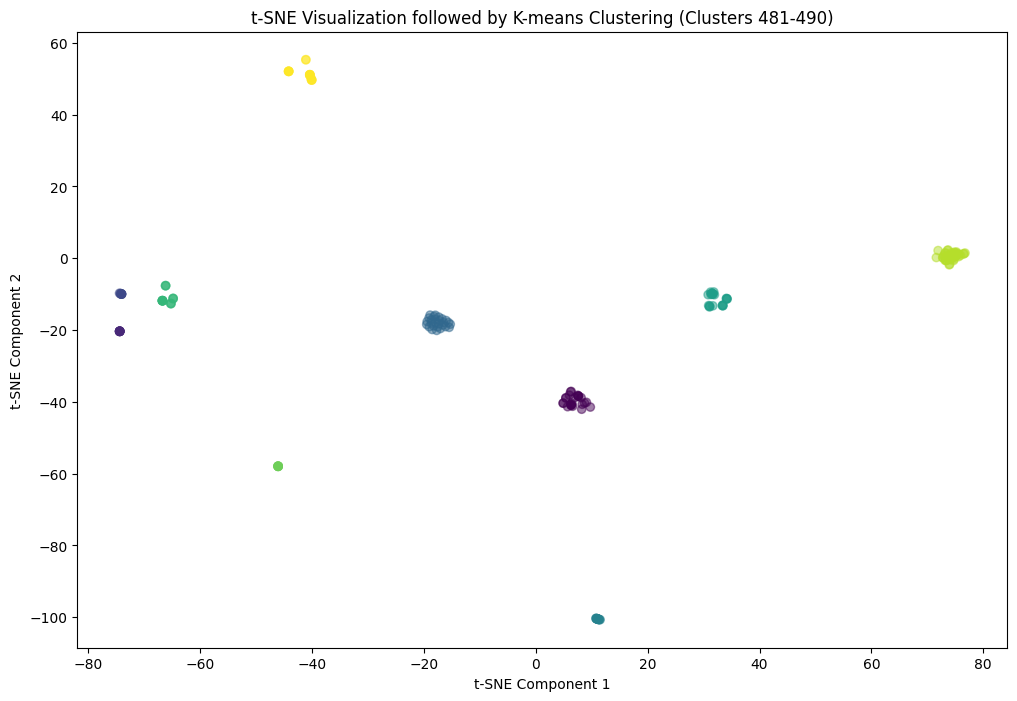

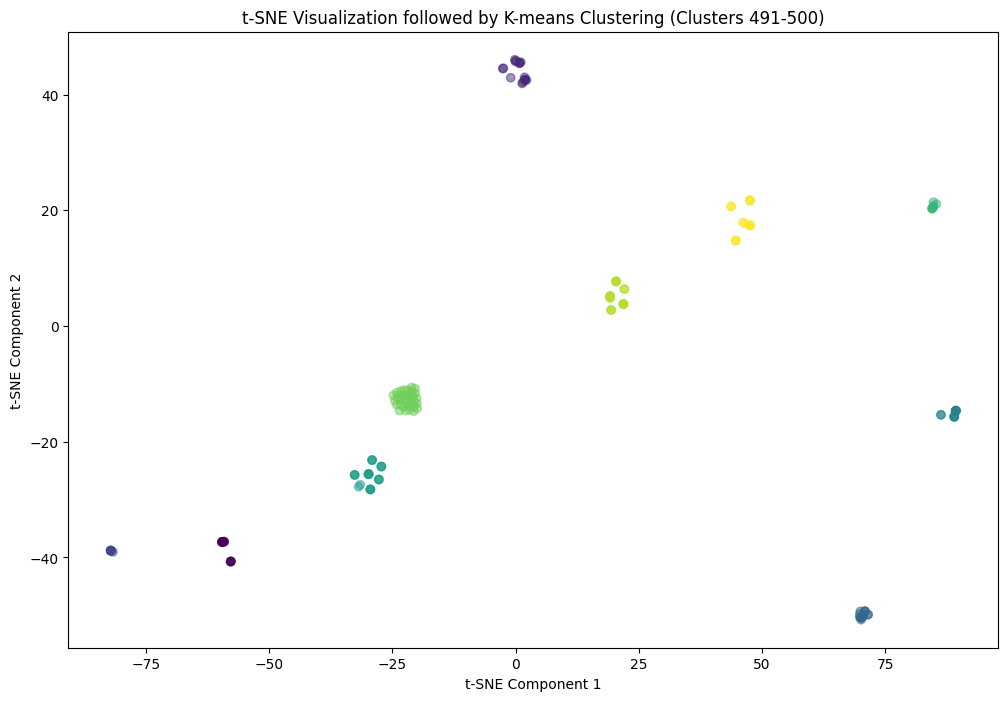

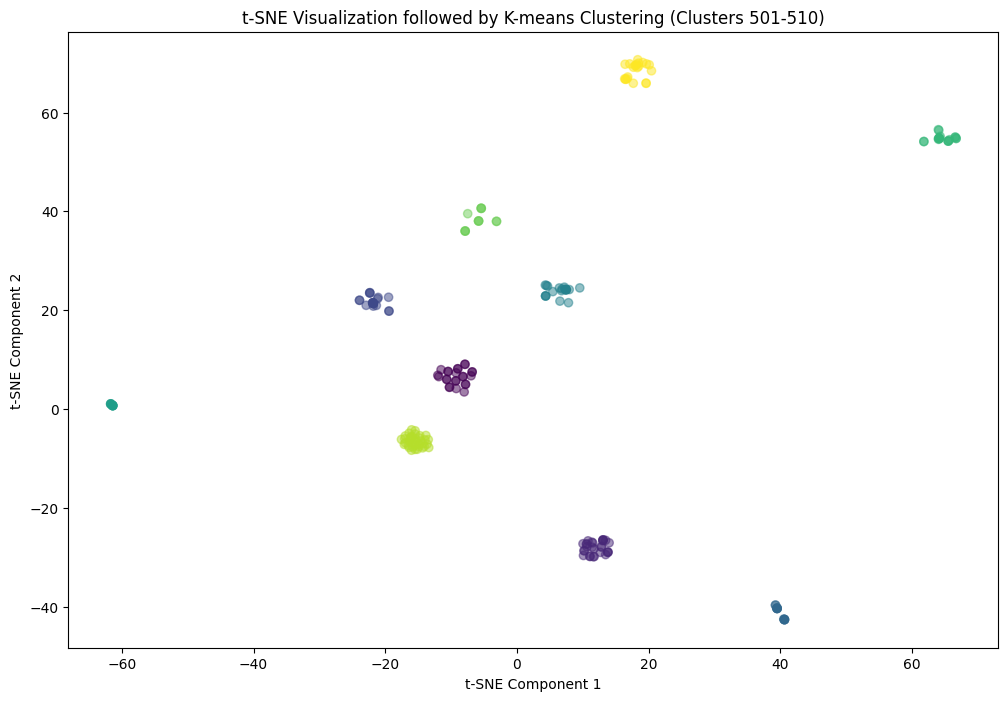

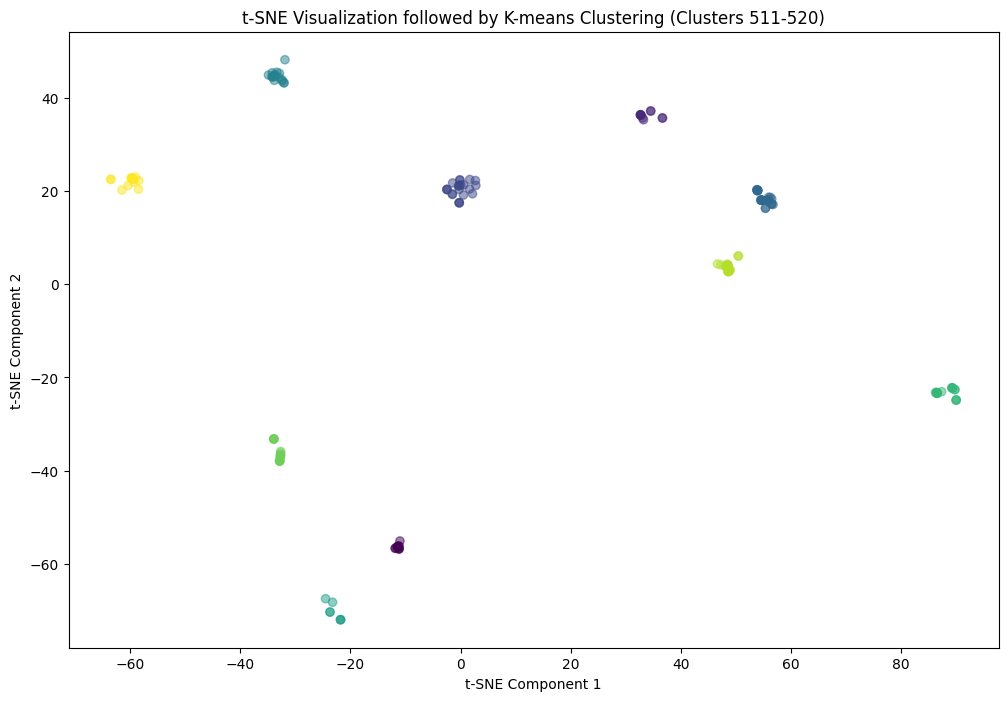

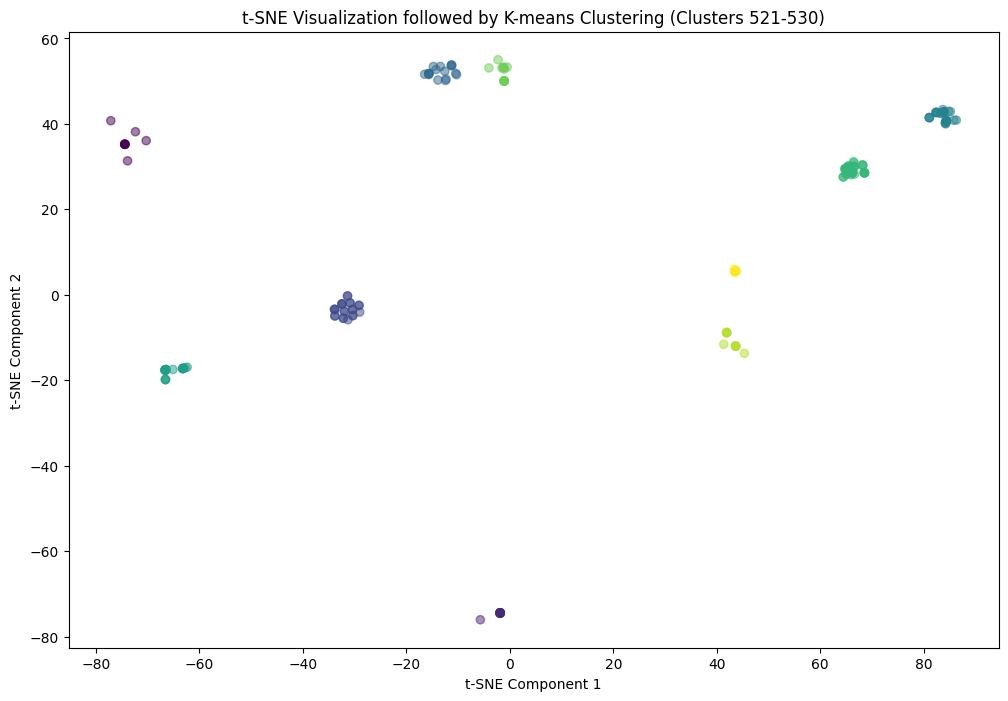

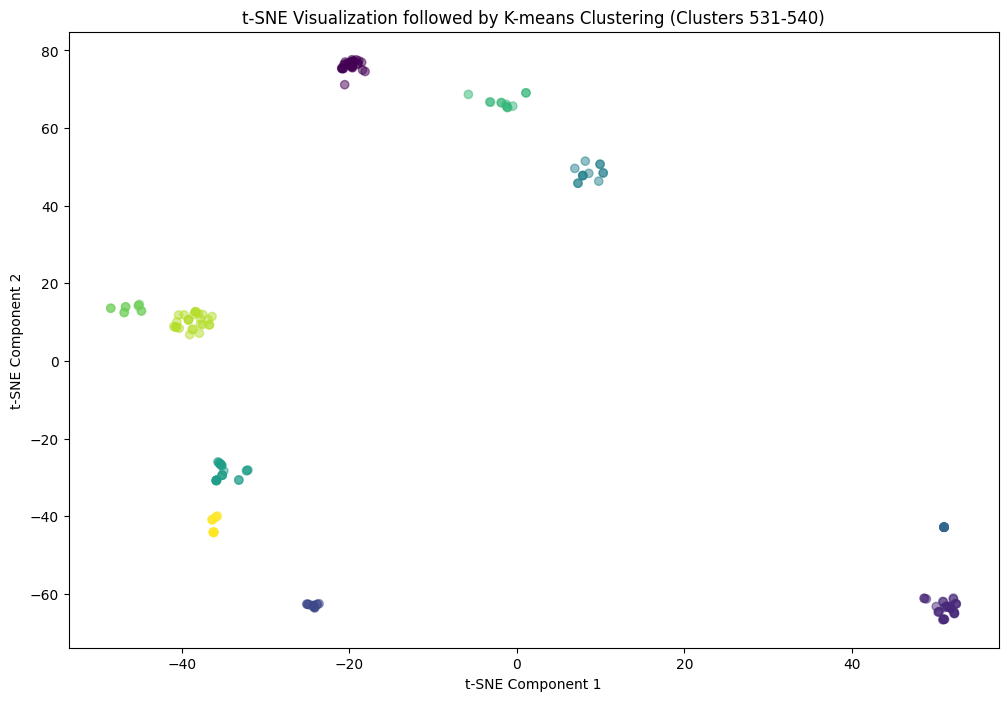

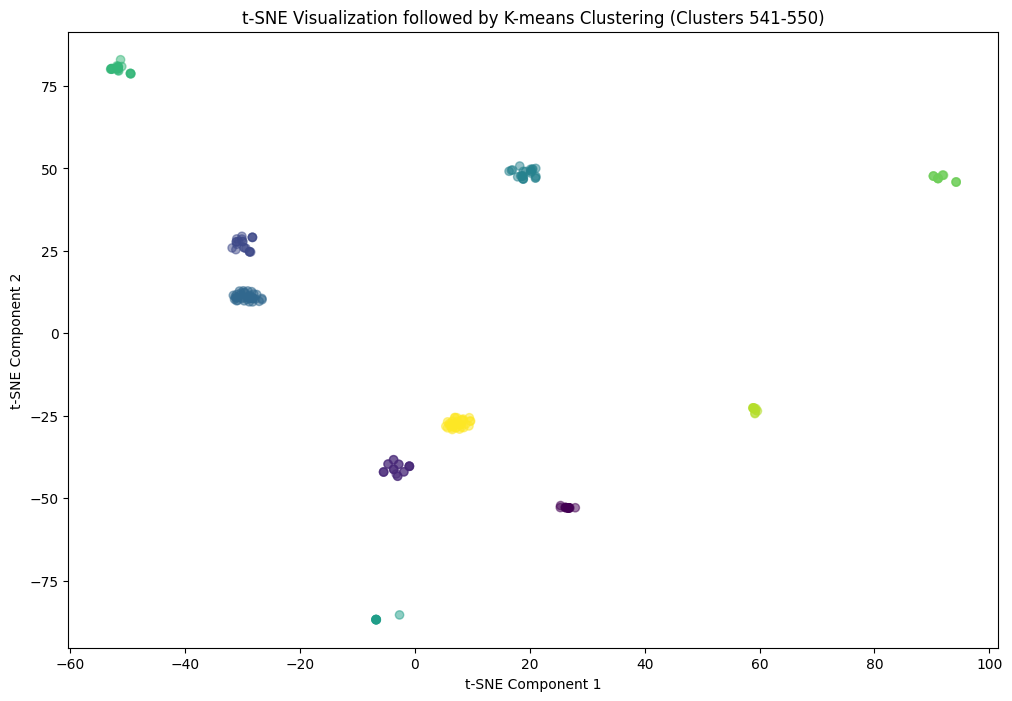

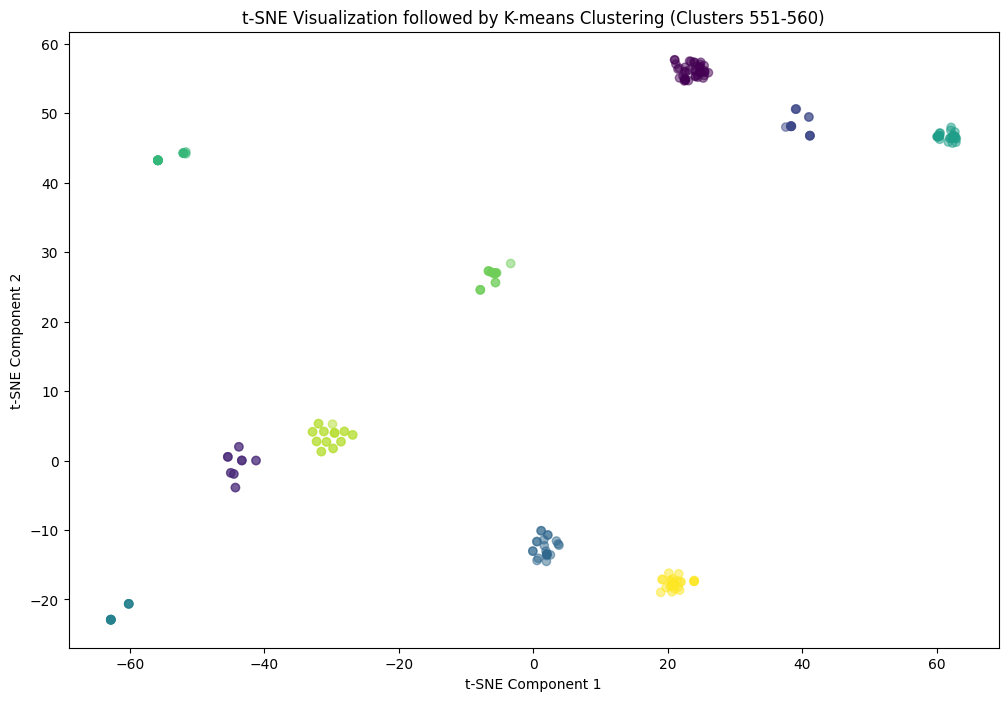

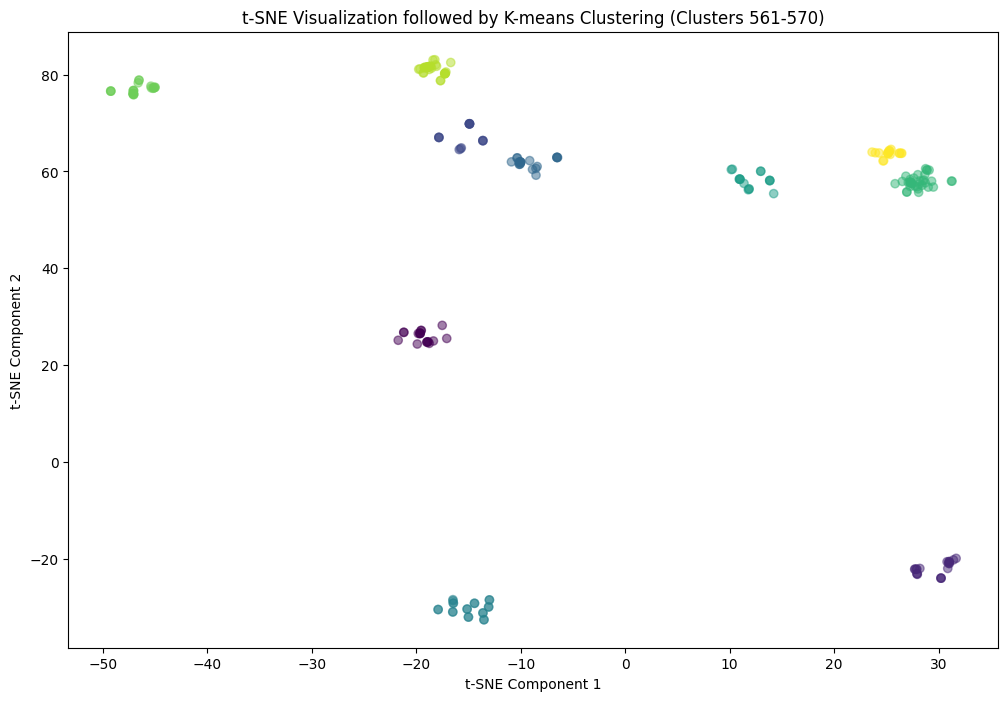

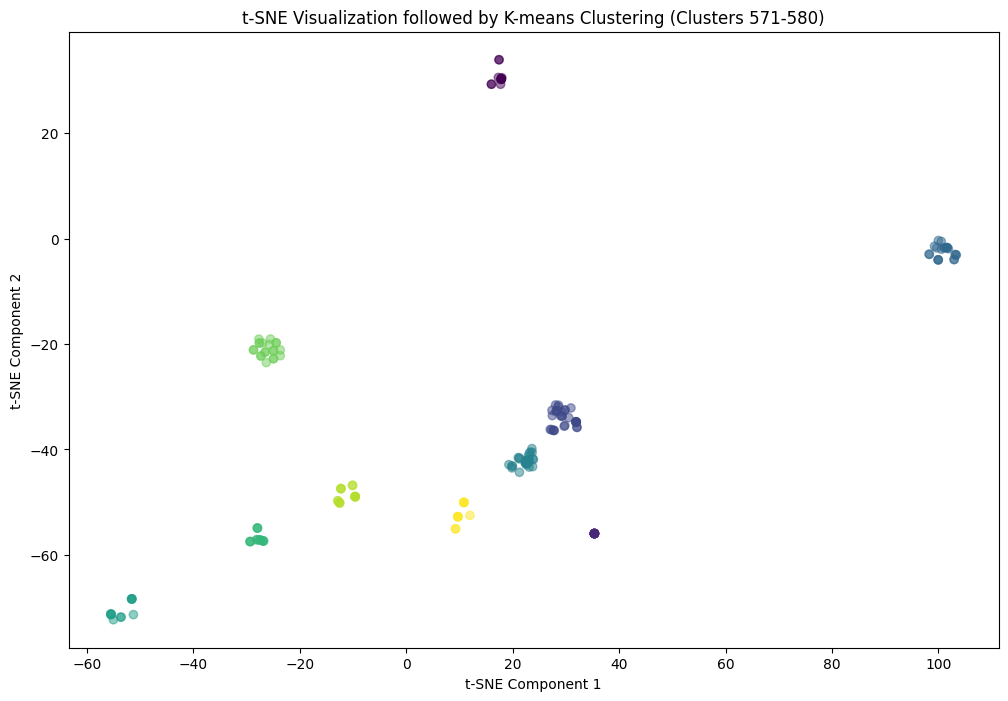

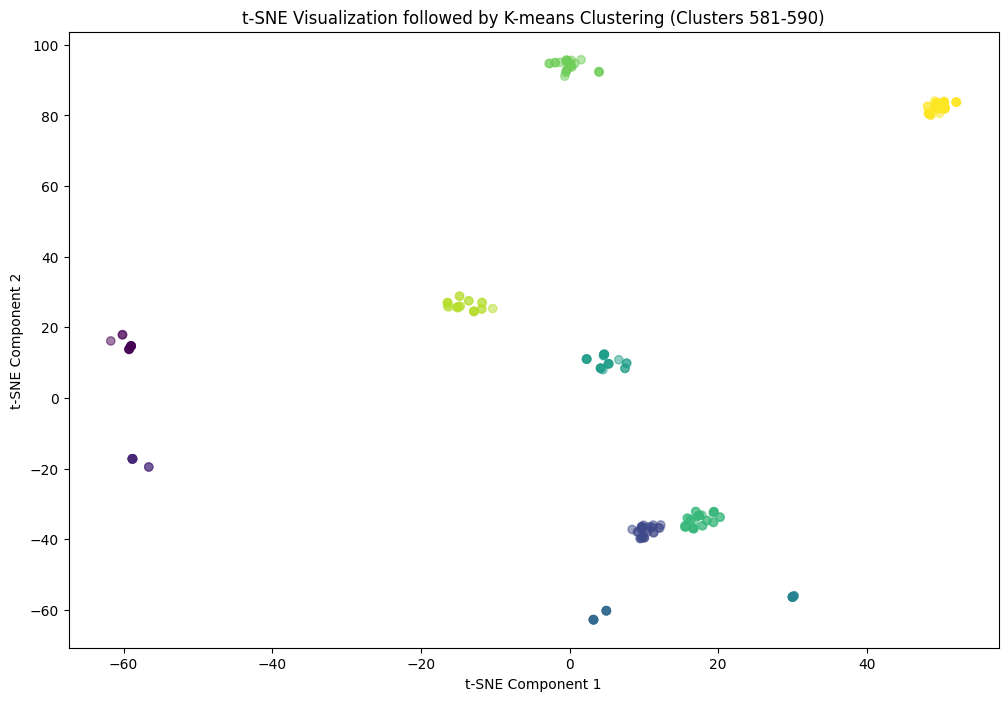

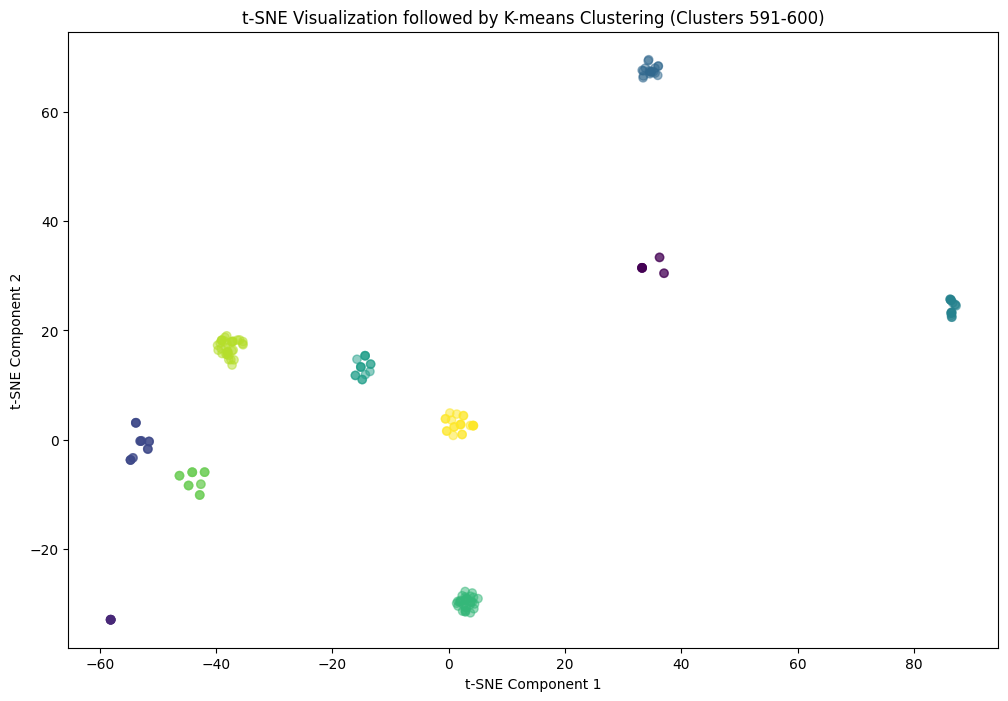

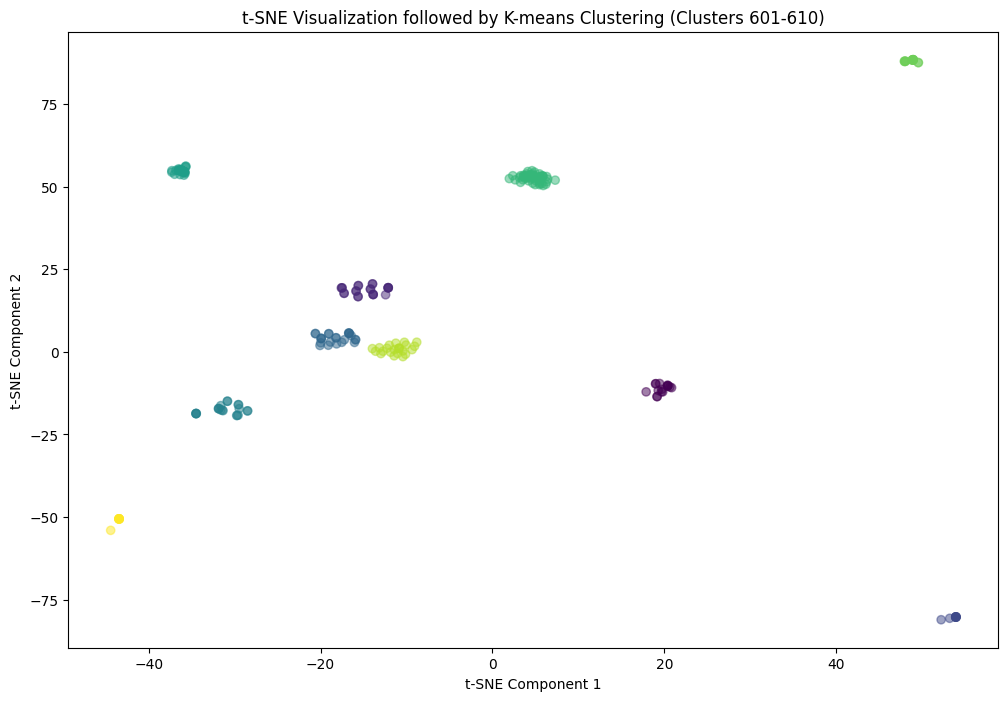

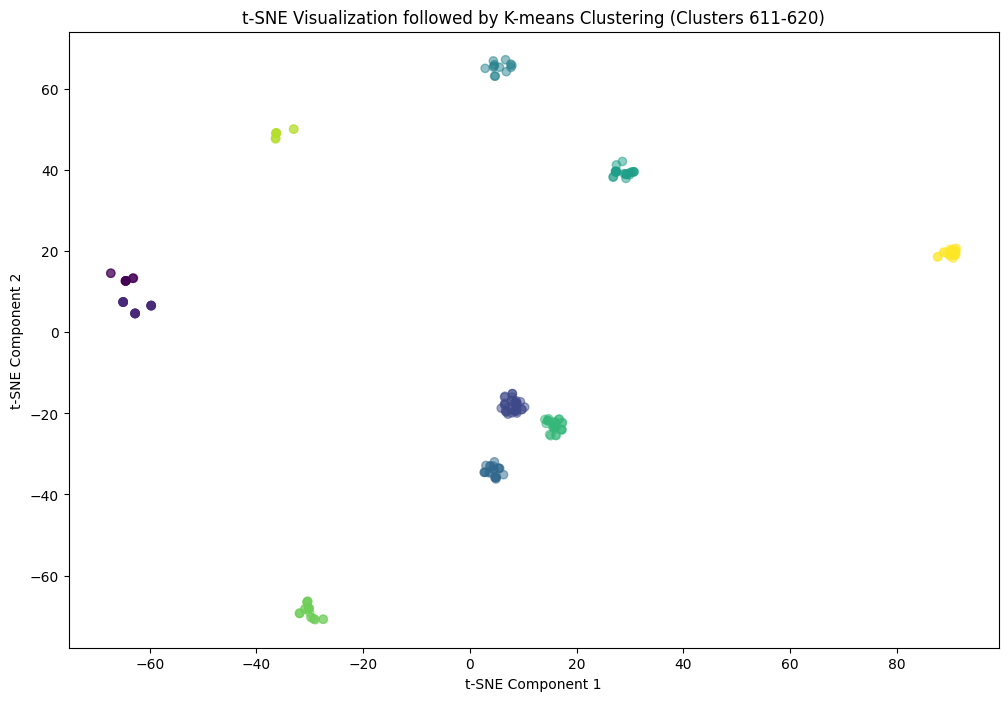

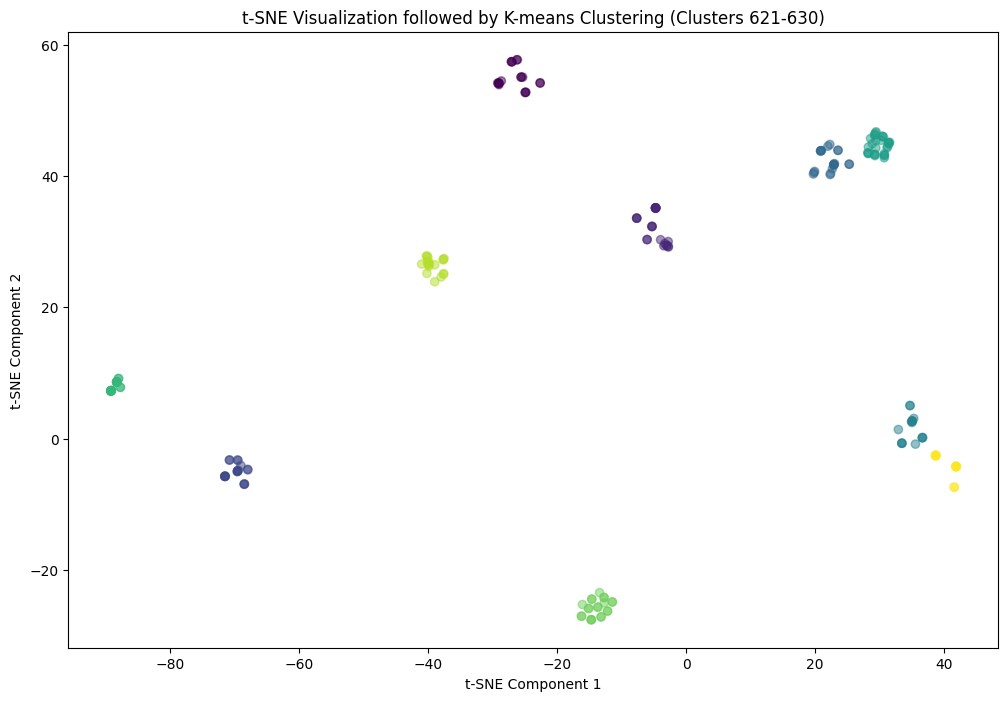

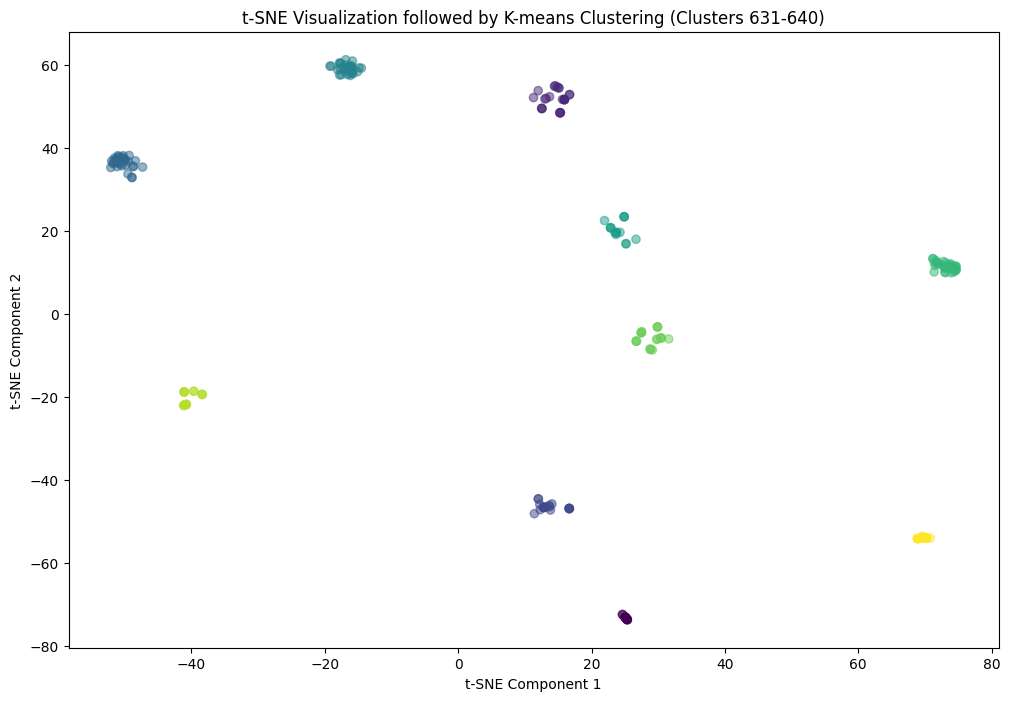

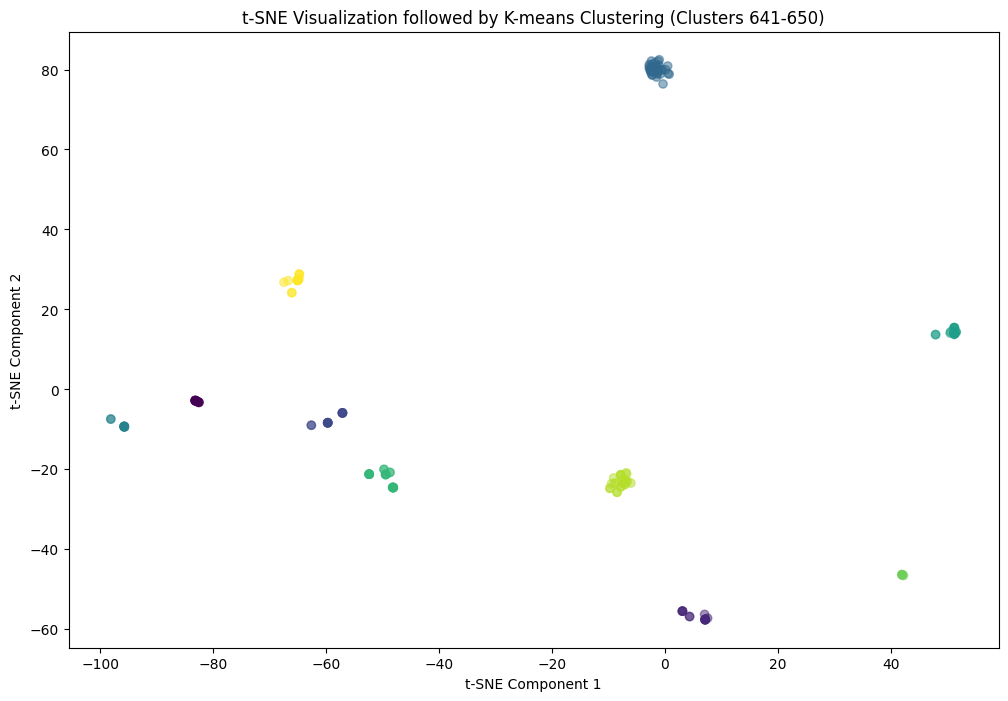

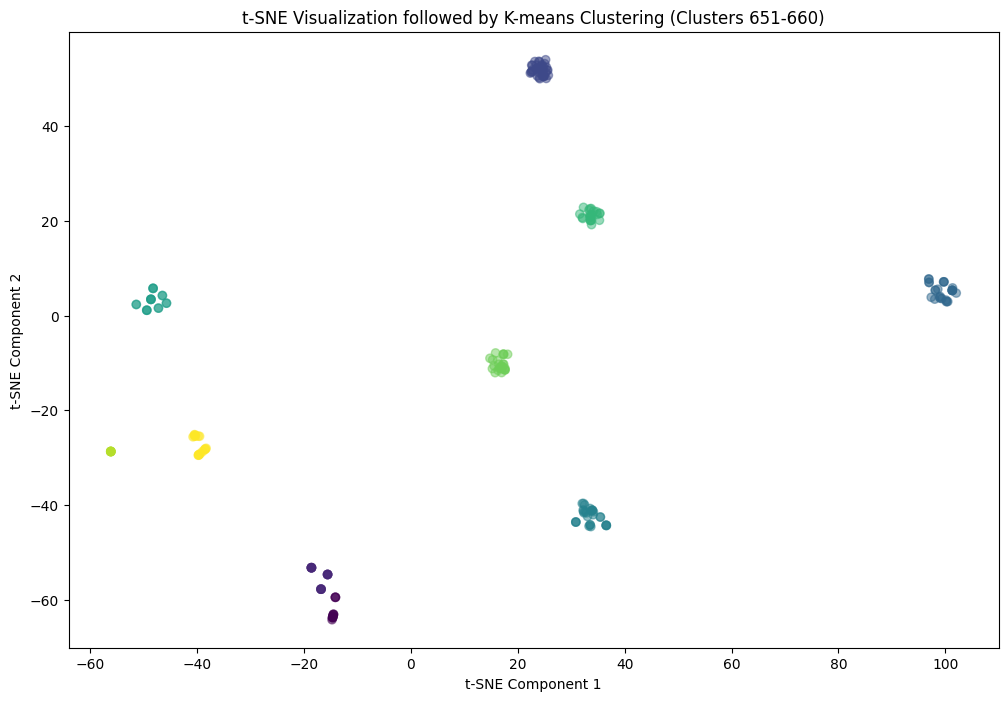

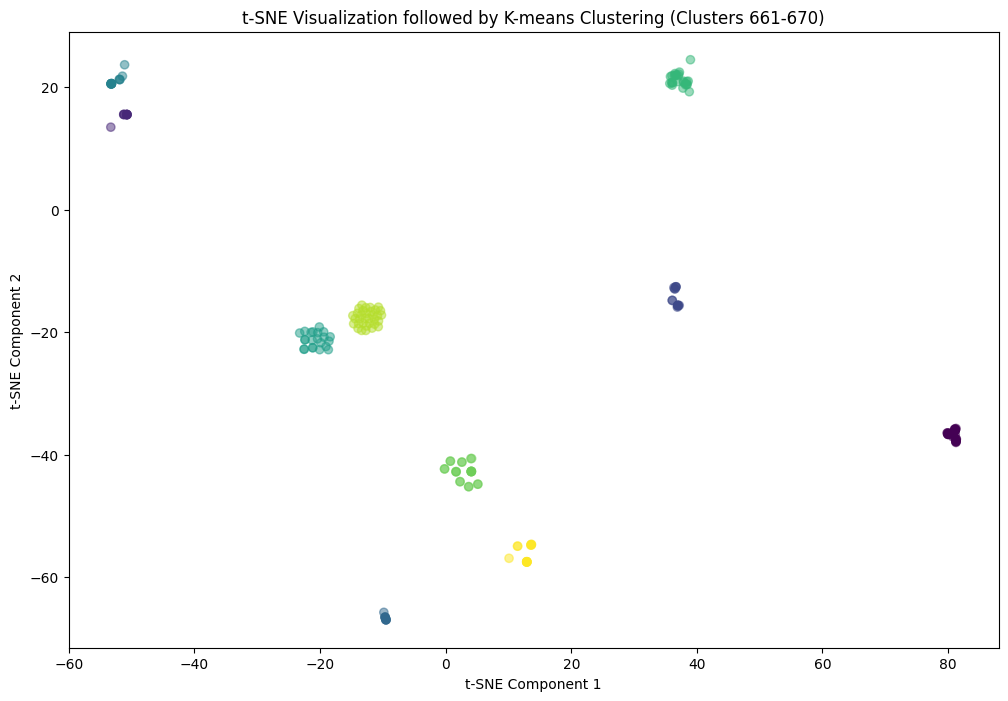

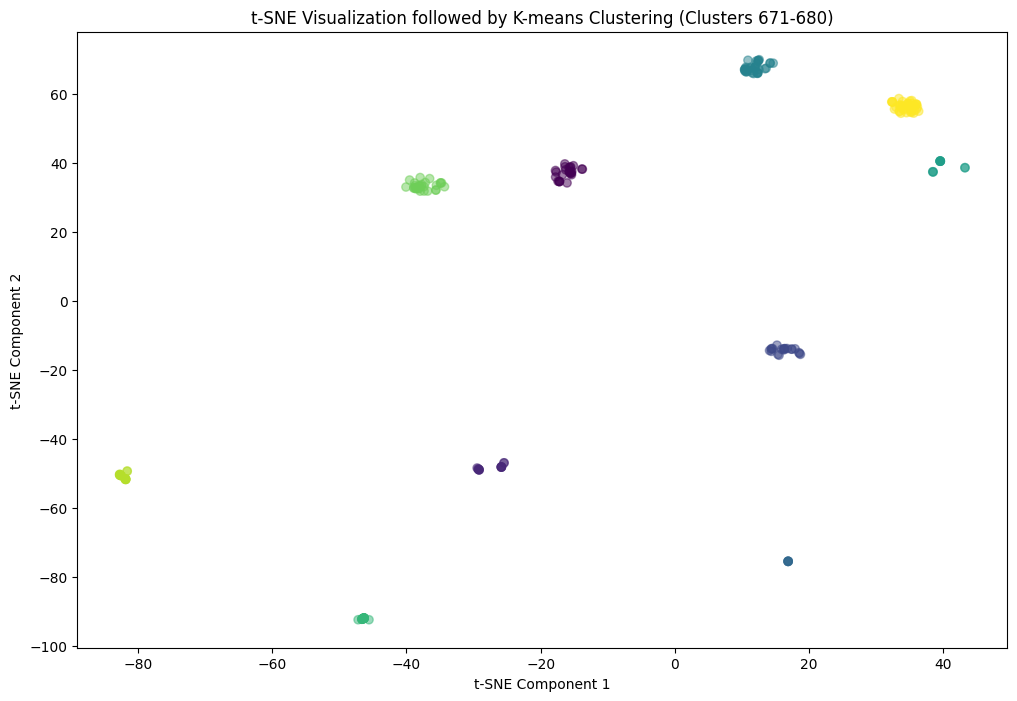

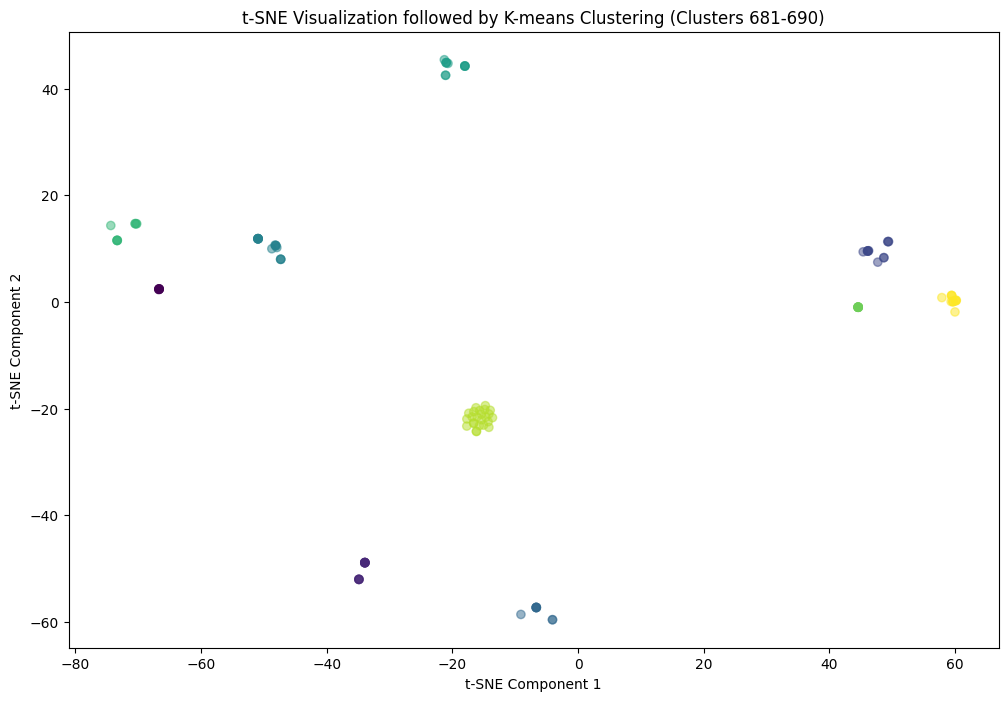

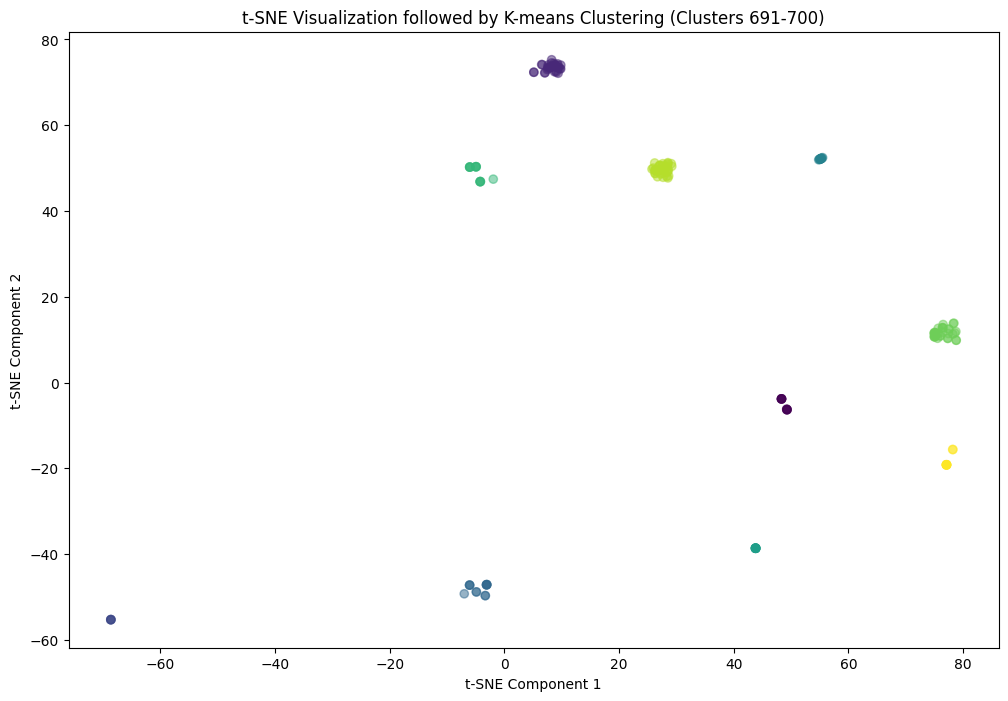

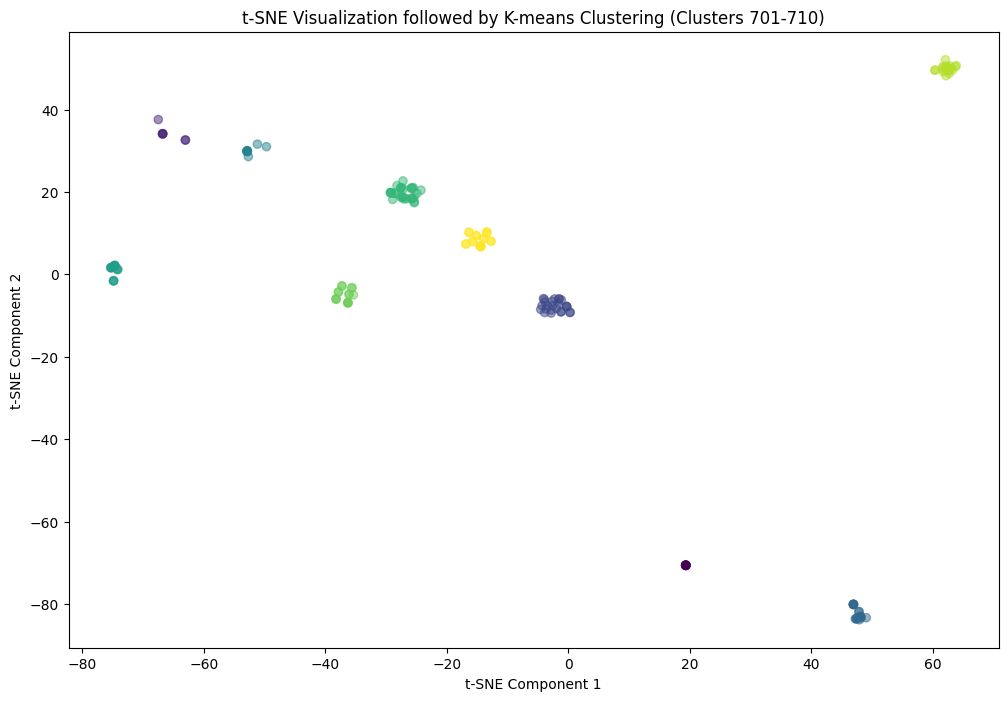

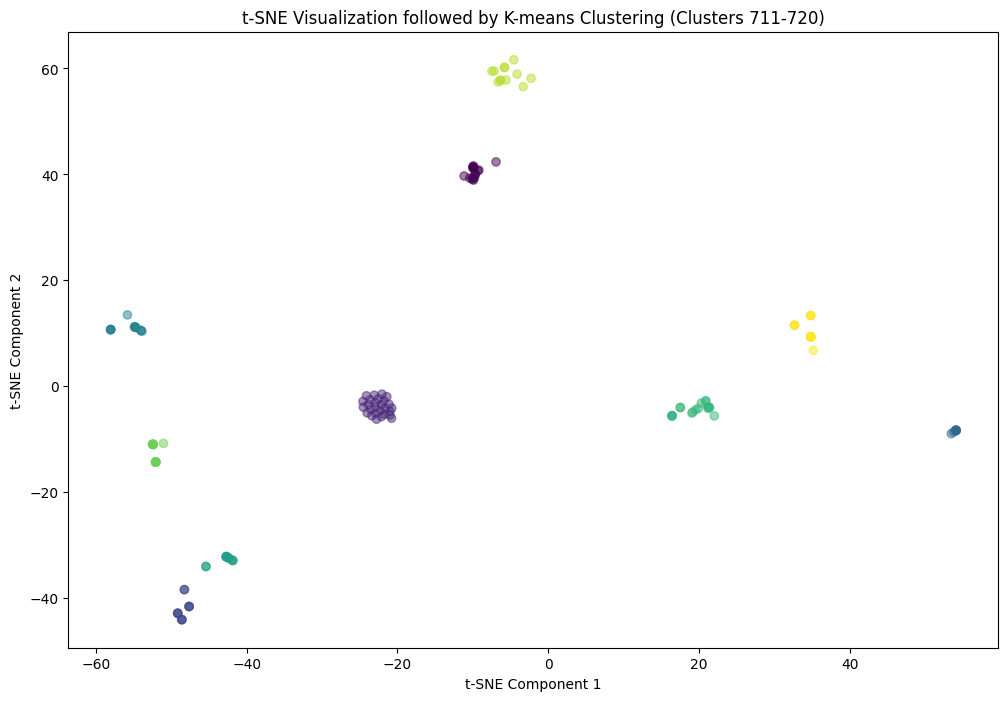

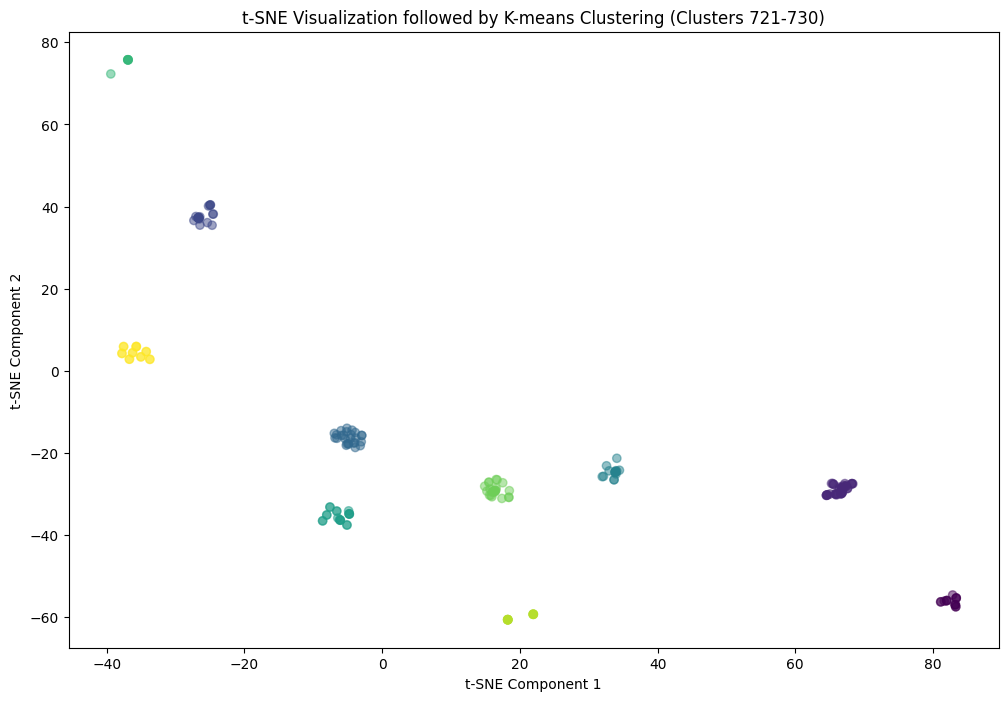

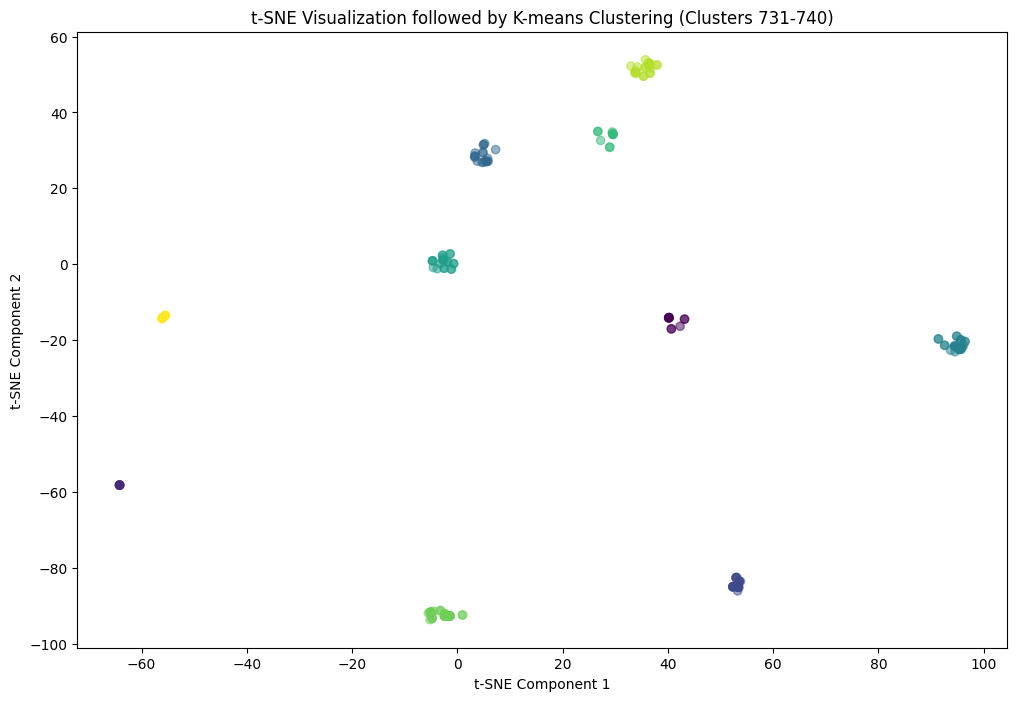

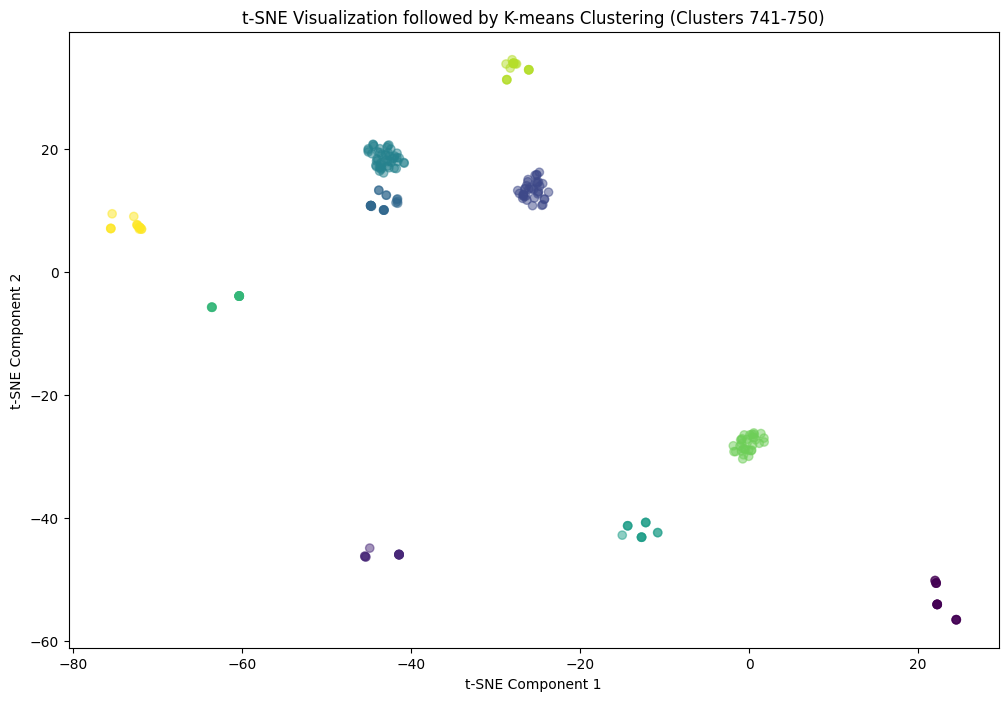

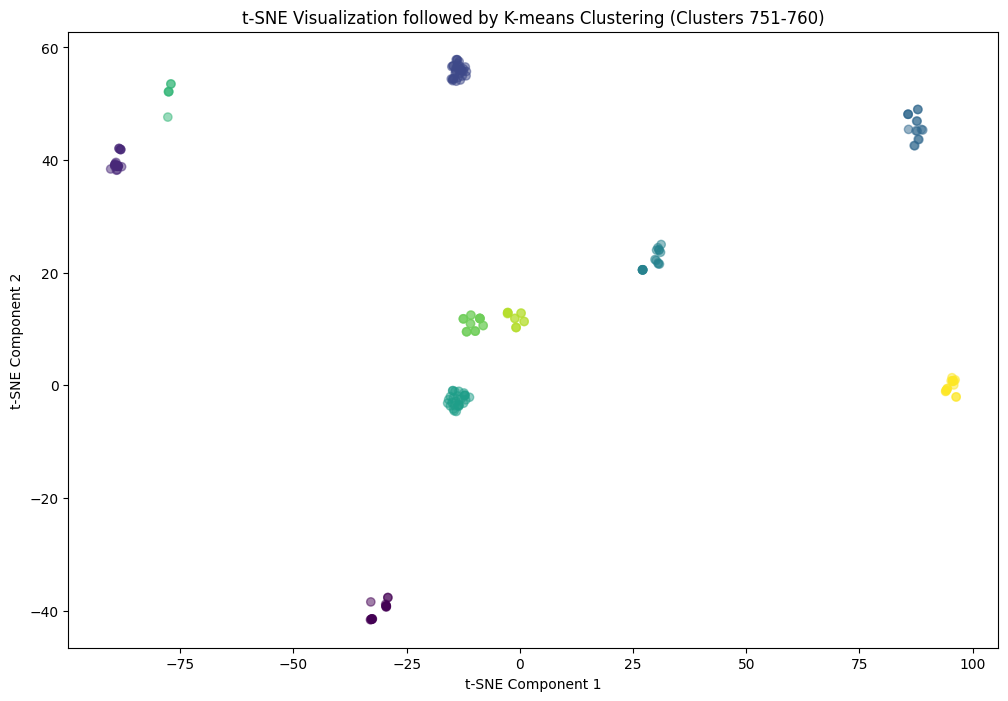

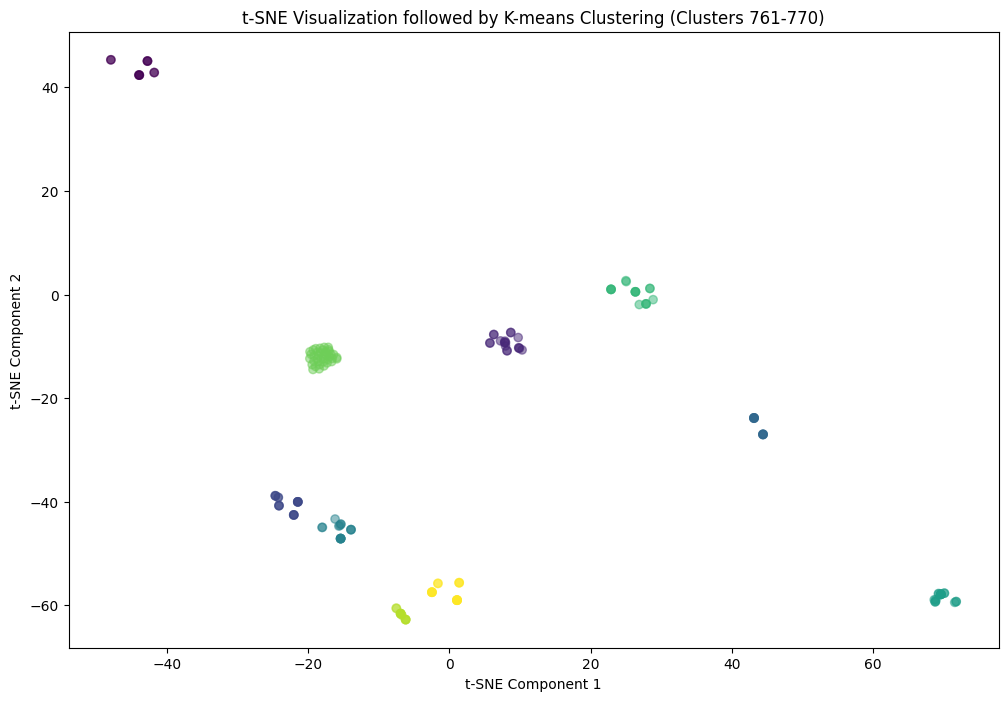

In [ ]:
clusters_per_figure = 10
num_figures = k // clusters_per_figure

# Iterate through each figure
for i in range(num_figures):
    start_cluster = i * clusters_per_figure
    end_cluster = (i + 1) * clusters_per_figure

    # Extract data for the current clusters
    subset_df = combined_df[combined_df['cluster'].between(start_cluster, end_cluster - 1)]

    # Create a scatter plot for the current clusters
    plt.figure(figsize=(12, 8))
    plt.scatter(subset_df['t-SNE Component 1'], subset_df['t-SNE Component 2'], c=subset_df['cluster'], cmap='viridis', alpha=0.5)
    plt.title(f't-SNE Visualization followed by K-means Clustering (Clusters {start_cluster+1}-{end_cluster})')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()